In [ ]:
import matplotlib.pyplot as plt


def compute_y(x, W, bias):
# dreapta de decizie
# [x, y] * [W[0], W[1]] + b = 0
  return (-x * W[0] - bias) / (W[1] + 1e-10)


def plot_decision_boundary(X, y , W, b, current_x, current_y): 
  x1 = -0.5
  y1 = compute_y(x1, W, b)
  x2 = 0.5
  y2 = compute_y(x2, W, b)
  # sterge continutul ferestrei plt.clf()
  # ploteaza multimea de antrenare
  color = 'r' 
  if(current_y == -1):
    color = 'b'
  plt.ylim((-1, 2))
  plt.xlim((-1, 2))
  plt.plot(X[y == -1, 0], X[y == -1, 1], 'b+')
  plt.plot(X[y == 1, 0], X[y == 1, 1], 'r+')
  # ploteaza exemplul curent plt.plot(current_x[0], current_x[1], color+'s') # afisarea dreptei de decizie
  plt.plot([x1, x2] ,[y1, y2], 'black')
  plt.show(block=False)
  plt.pause(0.3)

#### Exercitiul 2

Implementarea algoritmului widrow-hoff:
  - initializam weight-urile cu 0
  - amestecam datele de antrenare
  - pentru fiecare exemplu din setul de antrenare updatam weight-urile perceptronului cu ajutorul gradientilor.
  - repetam ultimii 2 pasi pentru un anumit numar de pasi.

In [ ]:
import numpy as np
def algoritmul_widrow_hoff(x_in, y_in, num_epochs, learning_rate):
  w = np.zeros(2)
  b = 0
  for epoch in range(num_epochs):
    p = np.random.permutation(x_in.shape[0])
    x_in = x_in[p]
    y_in = y_in[p]
    for i in range(x_in.shape[0]):
      y_hat = np.dot(w,x_in[i]+b)
      loss = ((y_hat - y_in[i]) ** 2)/2.
      w = w - learning_rate * (y_hat-y_in[i])*x_in[i]
      b = b - learning_rate * (y_hat-y_in[i])
      plot_decision_boundary(x_in, y_in,w,b,x_in[i],y_in[i])

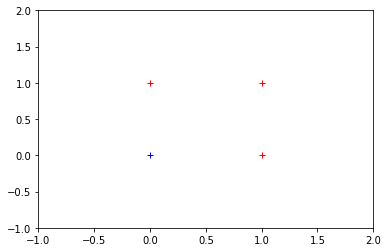

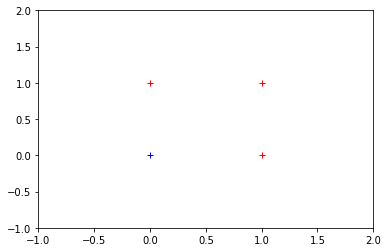

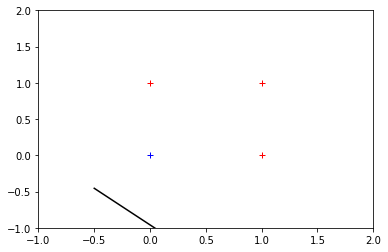

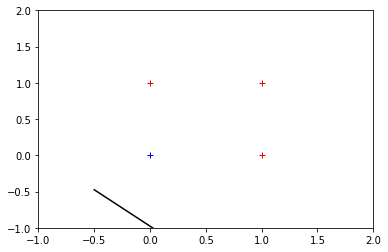

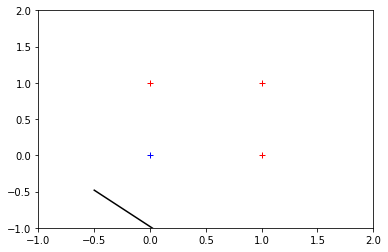

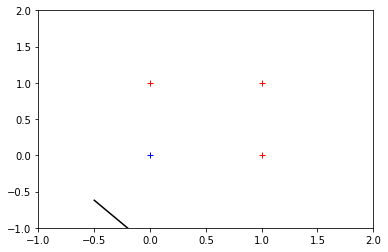

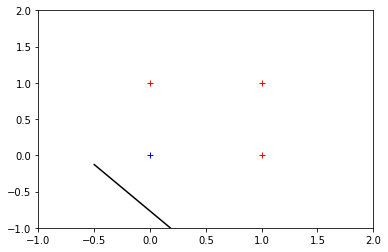

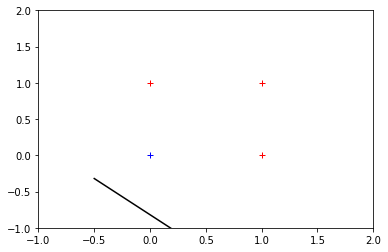

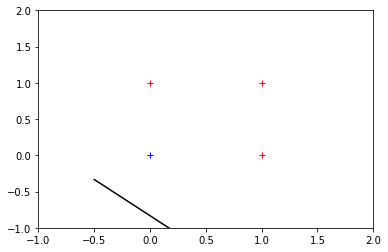

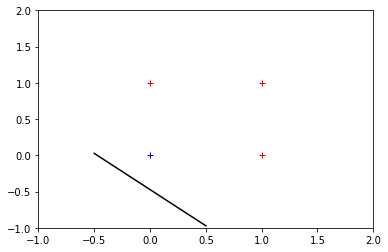

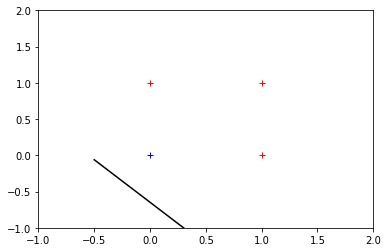

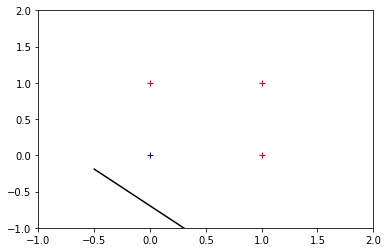

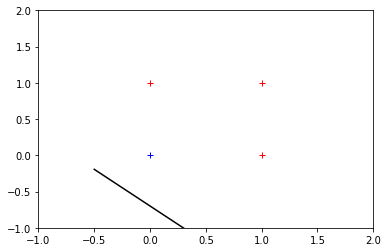

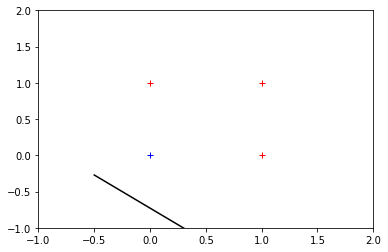

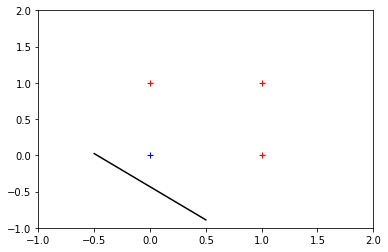

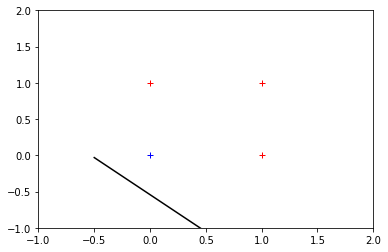

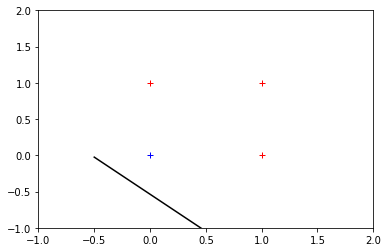

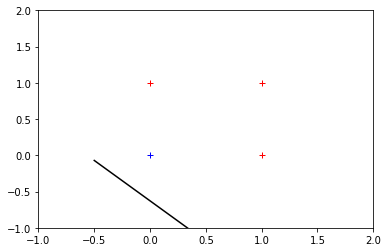

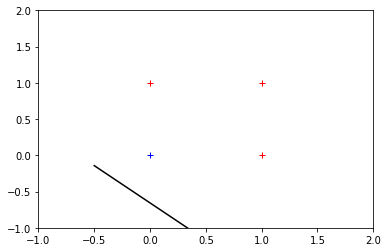

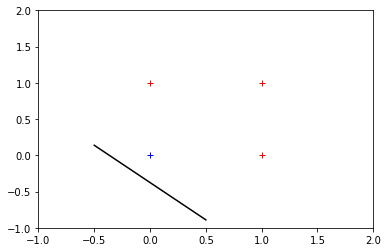

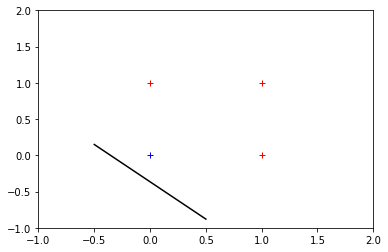

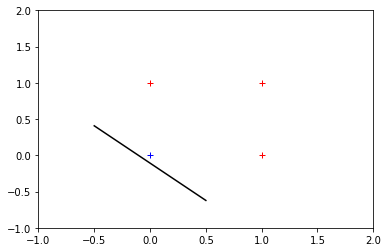

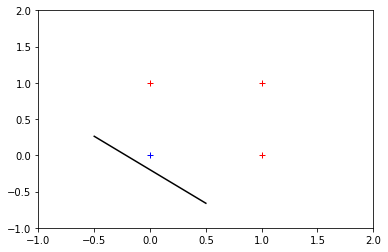

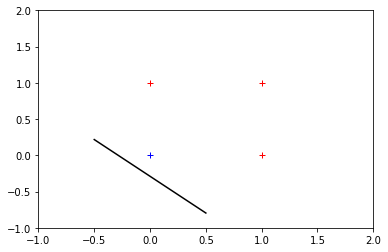

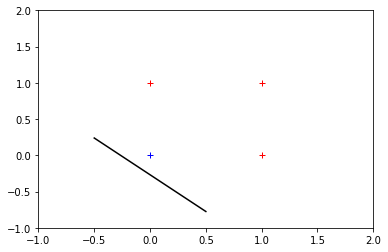

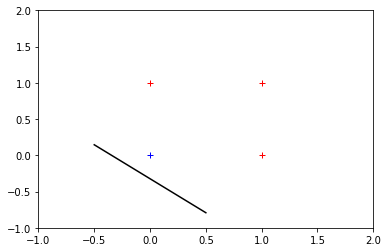

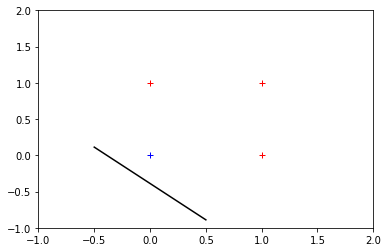

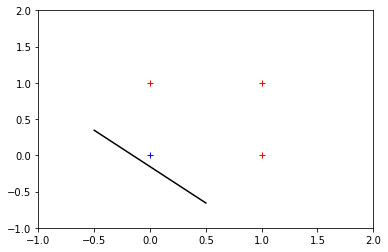

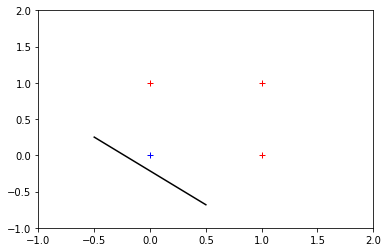

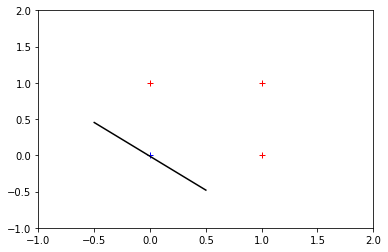

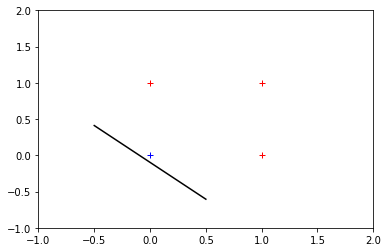

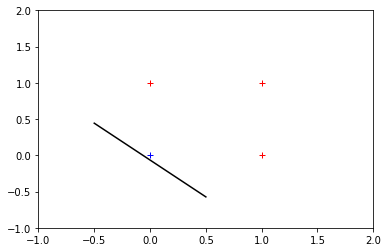

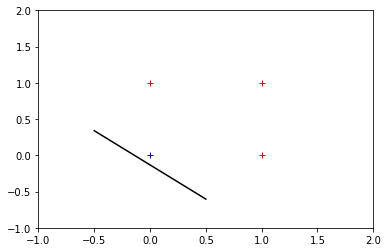

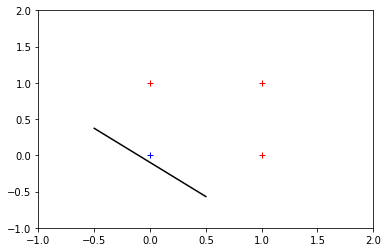

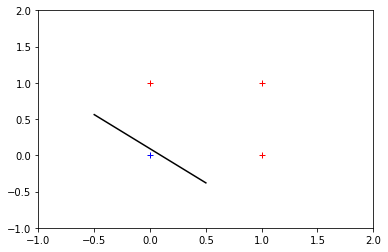

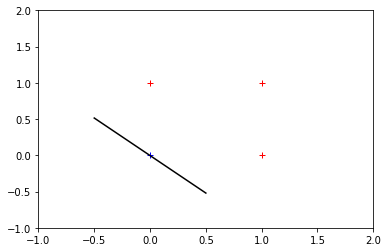

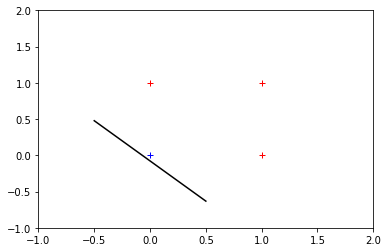

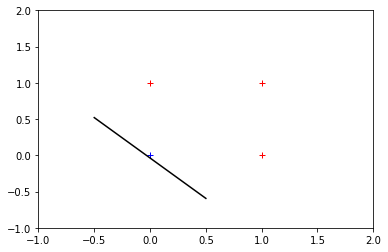

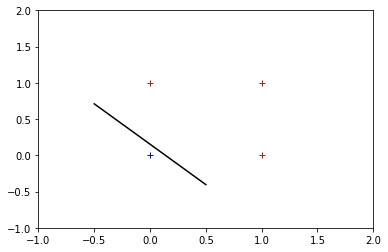

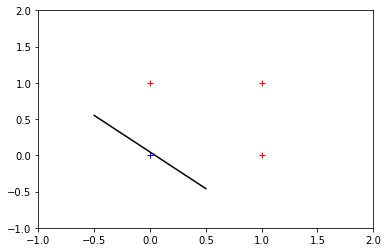

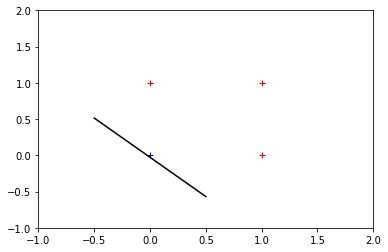

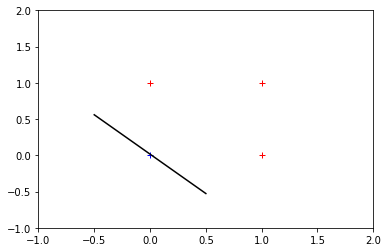

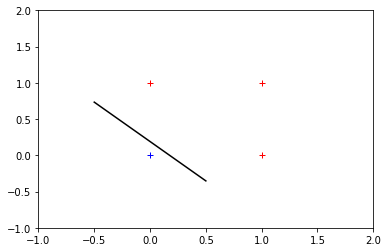

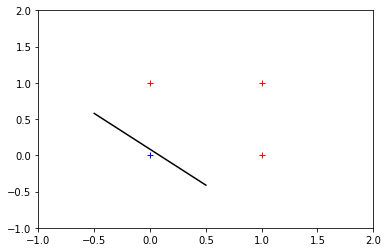

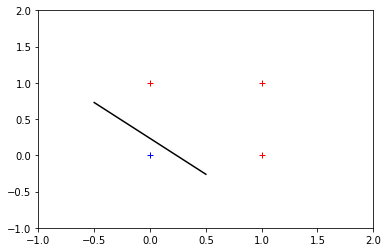

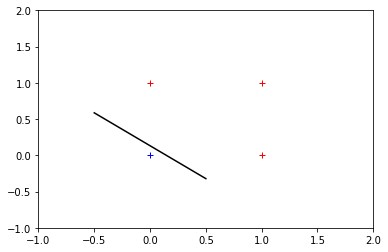

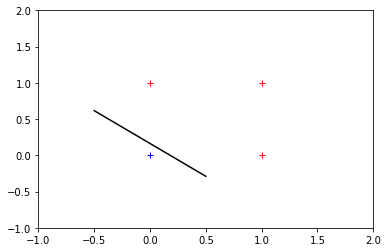

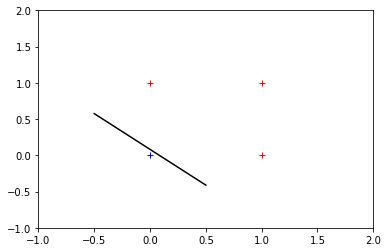

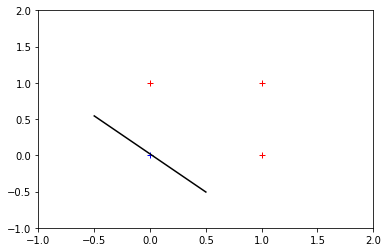

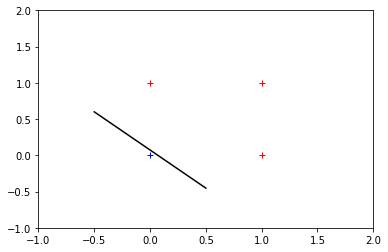

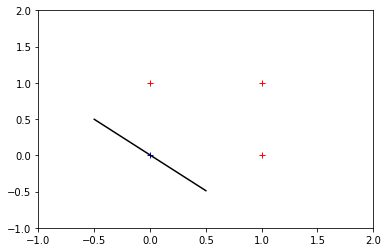

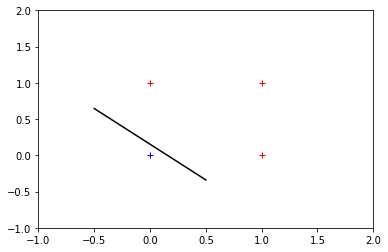

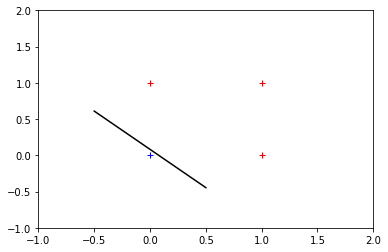

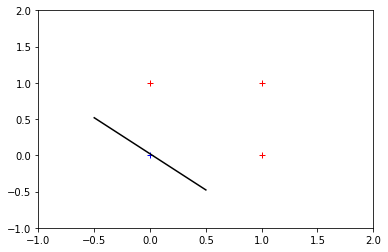

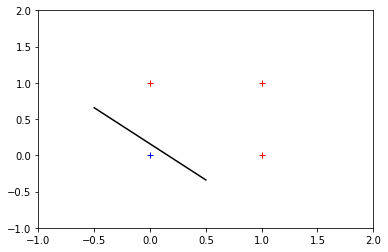

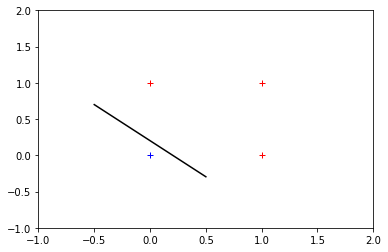

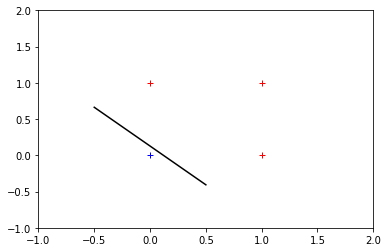

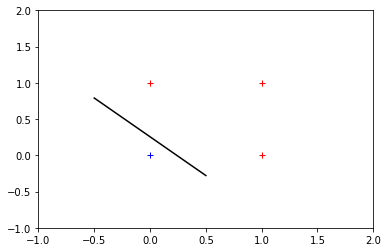

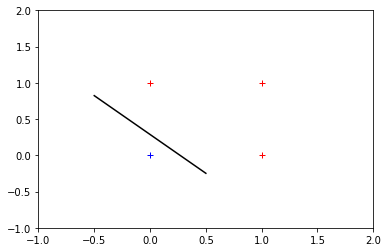

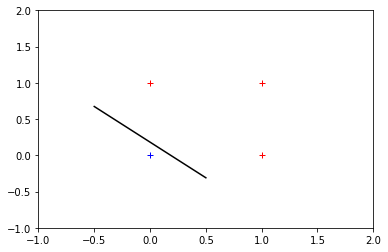

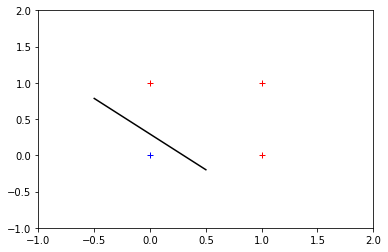

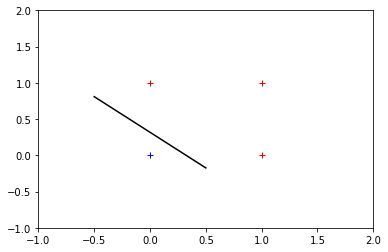

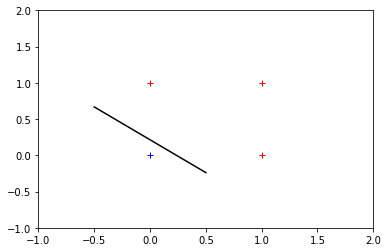

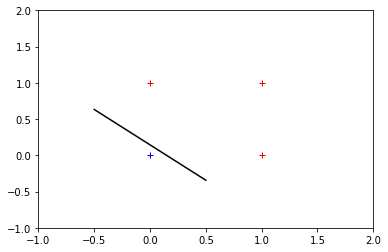

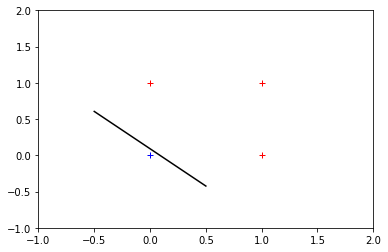

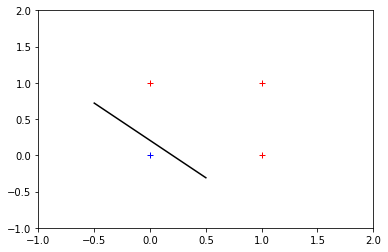

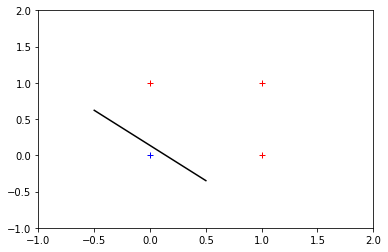

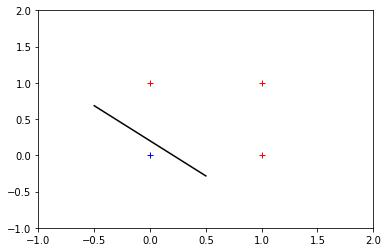

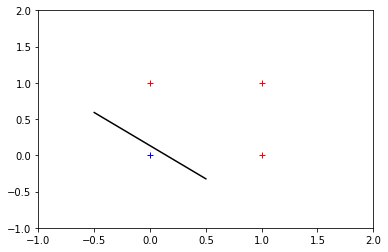

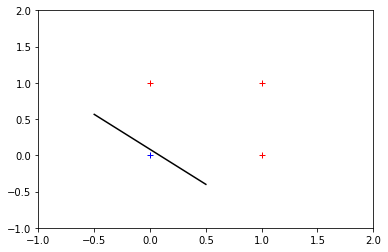

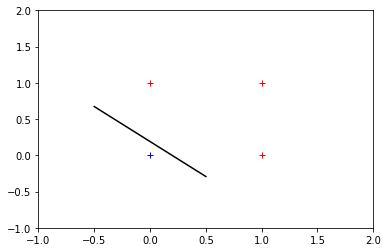

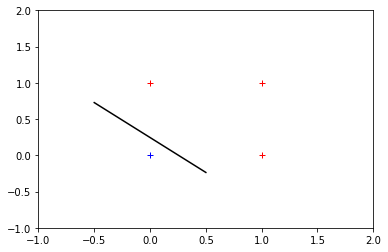

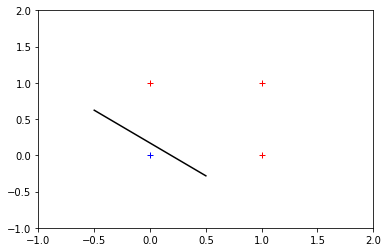

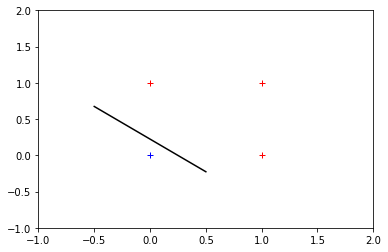

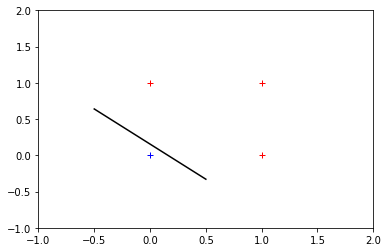

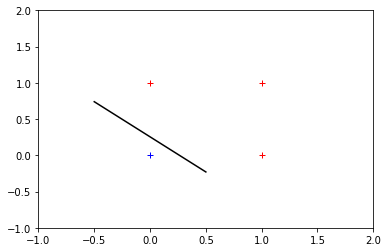

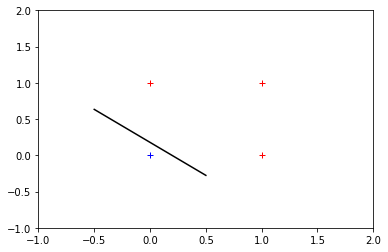

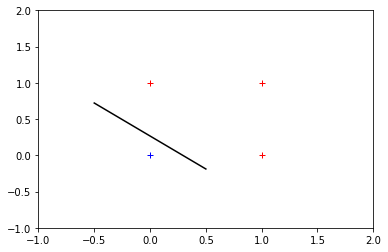

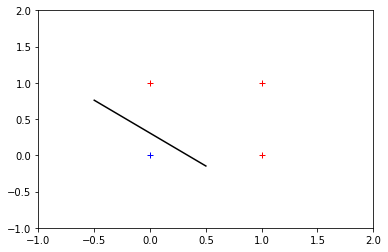

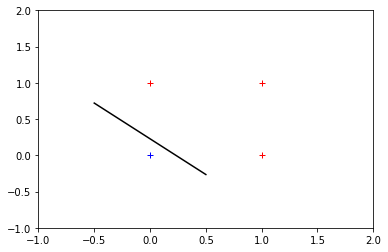

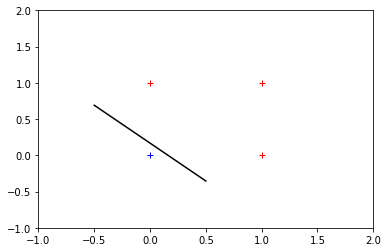

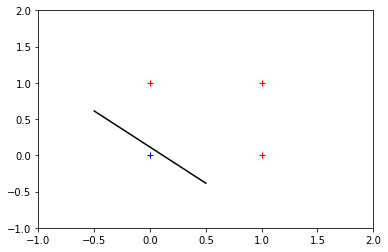

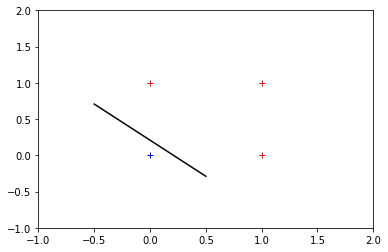

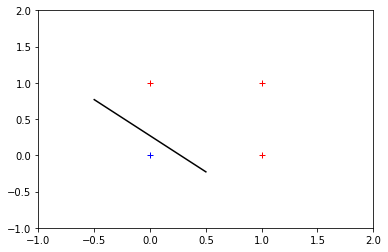

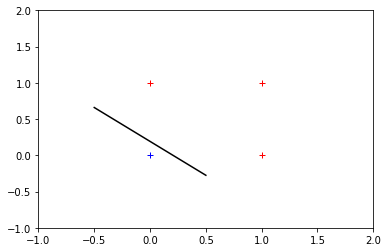

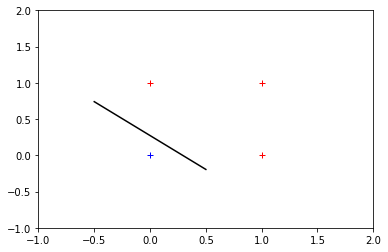

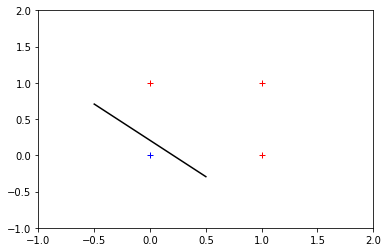

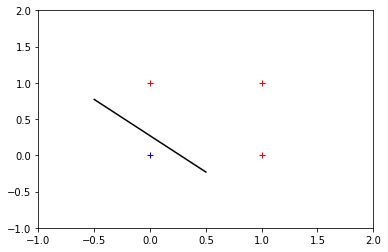

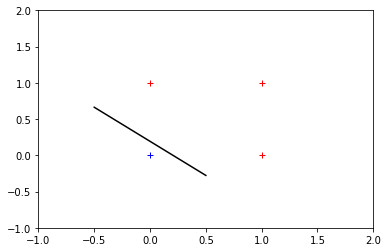

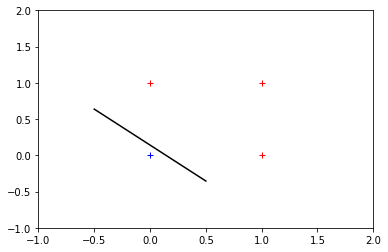

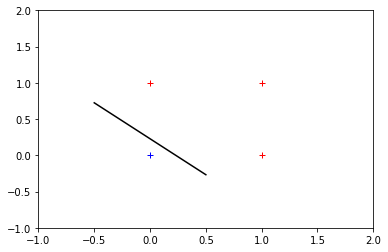

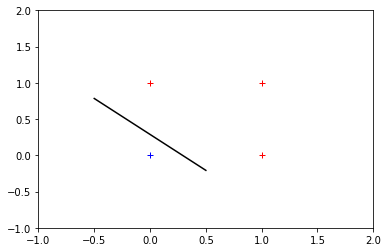

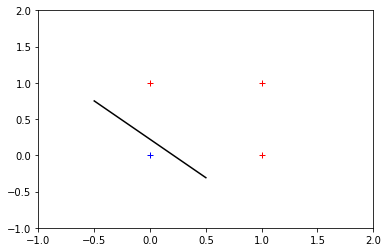

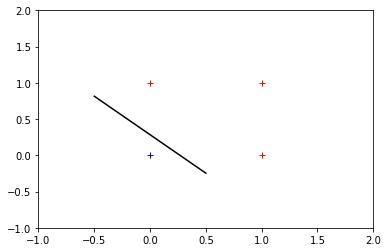

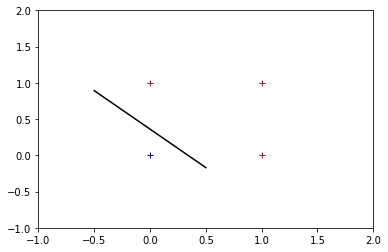

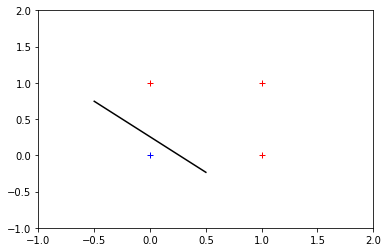

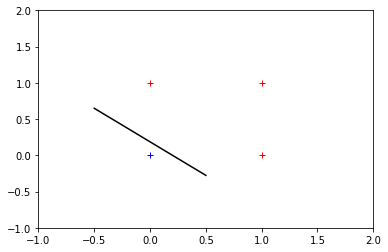

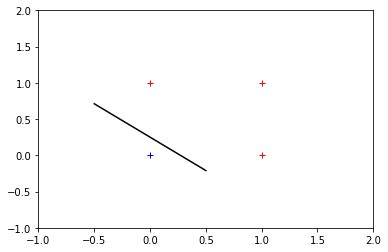

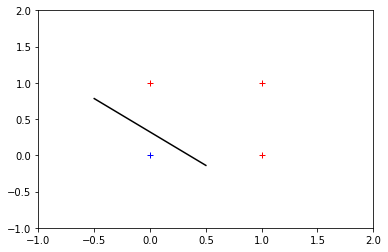

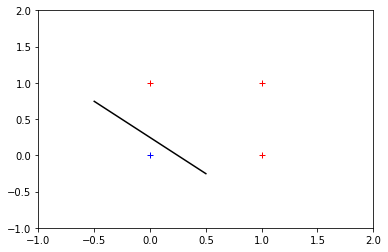

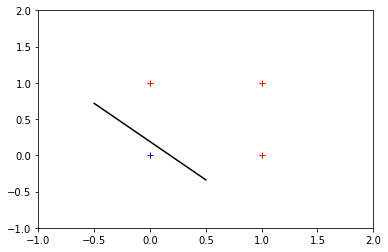

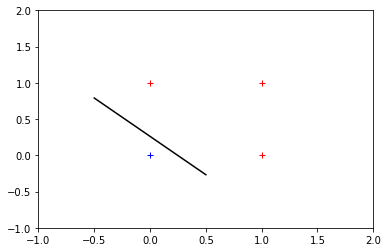

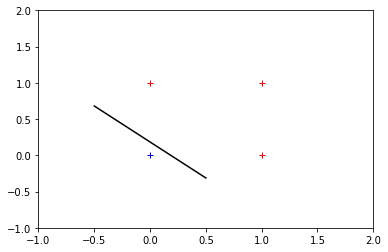

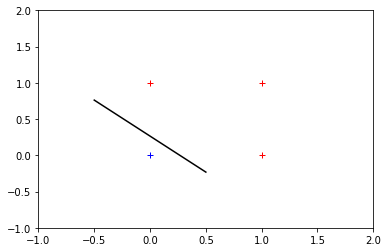

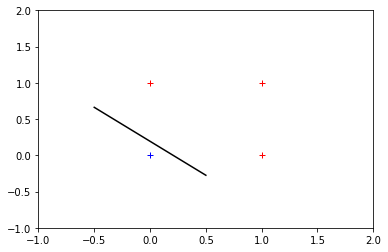

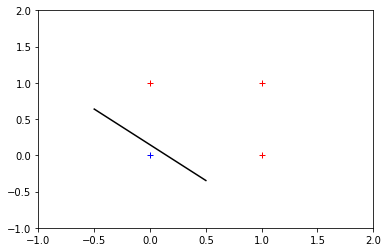

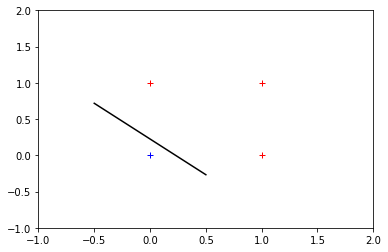

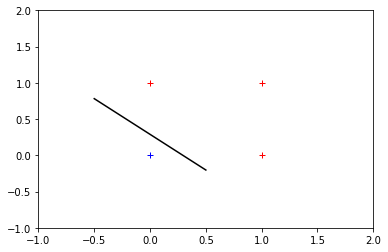

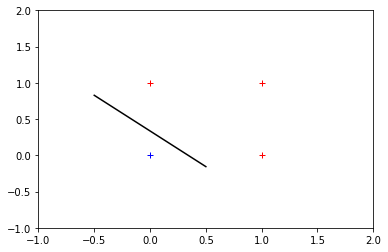

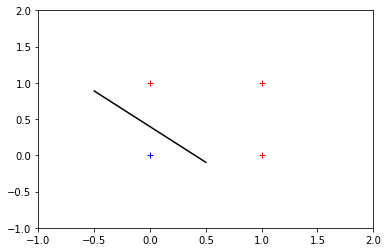

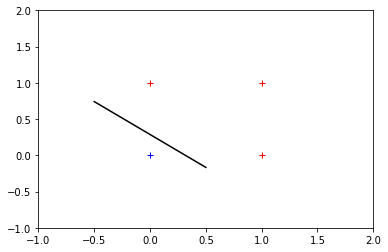

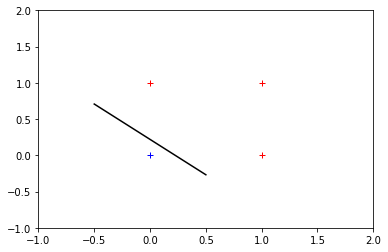

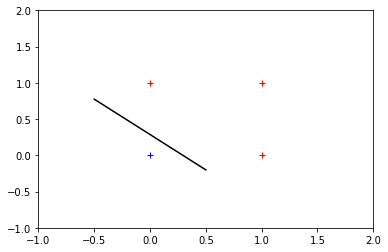

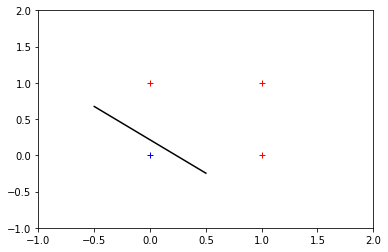

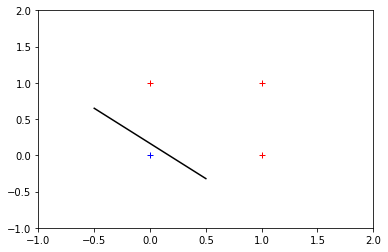

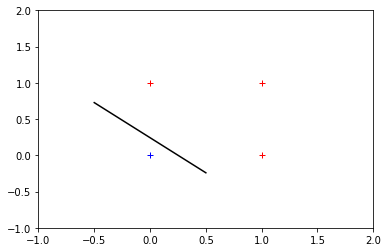

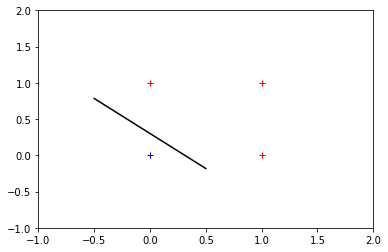

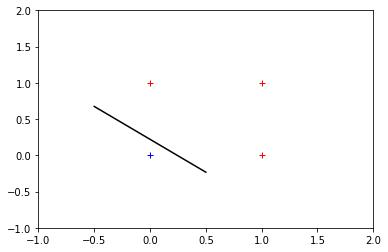

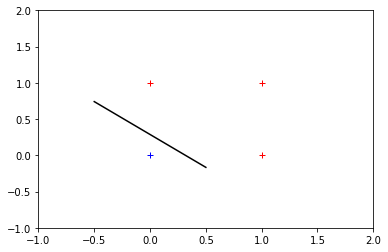

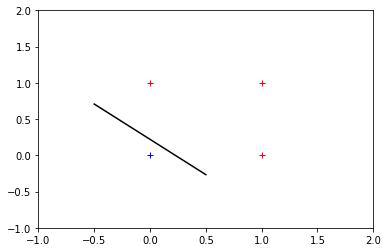

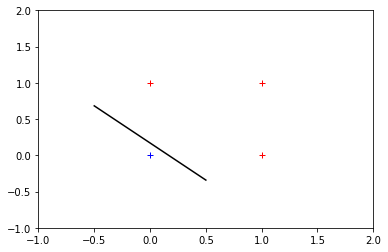

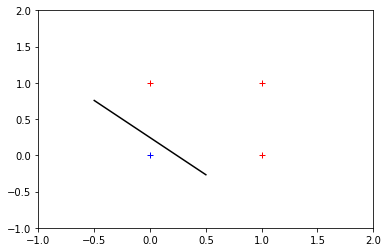

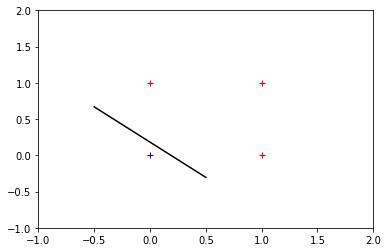

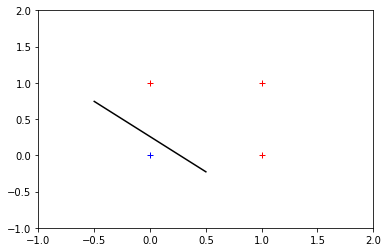

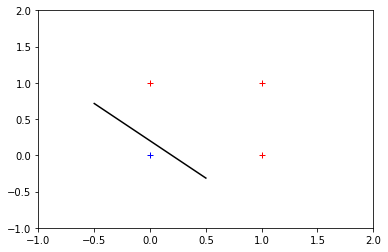

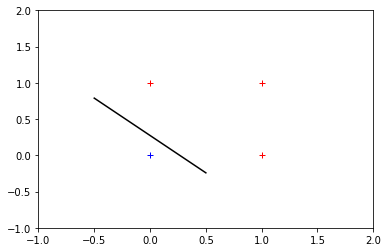

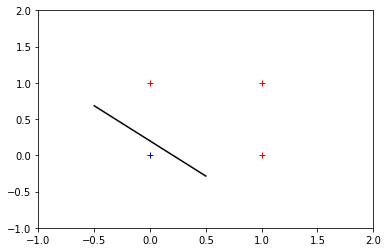

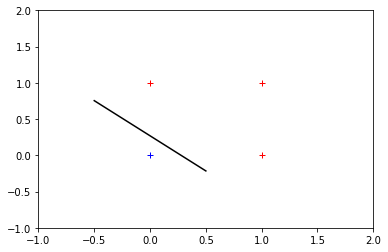

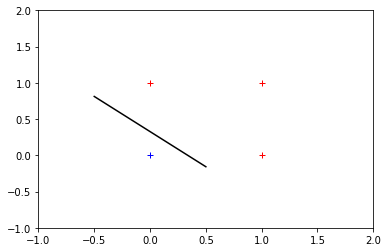

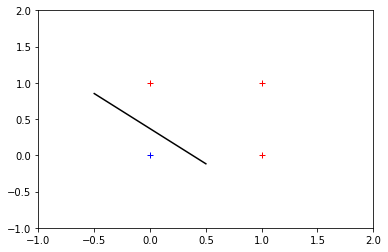

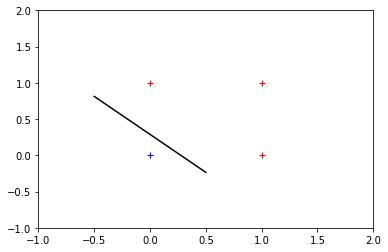

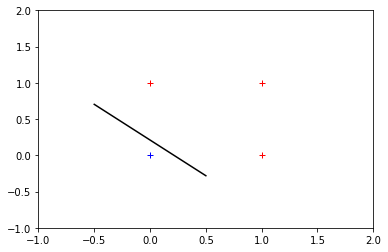

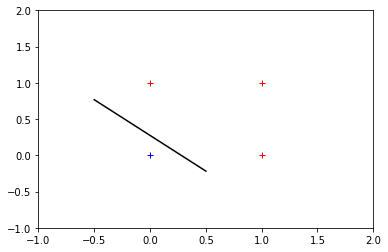

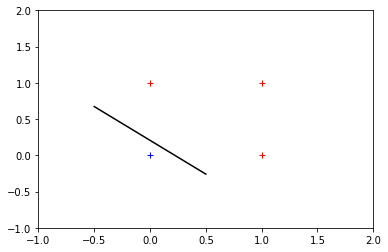

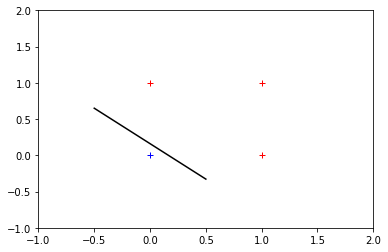

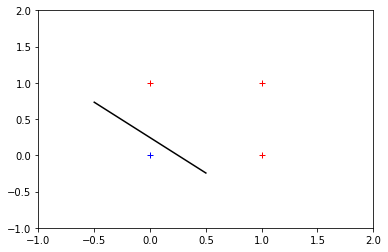

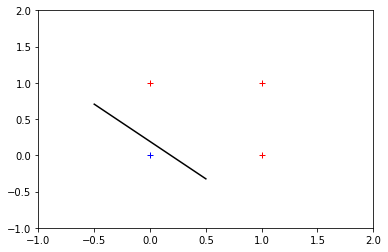

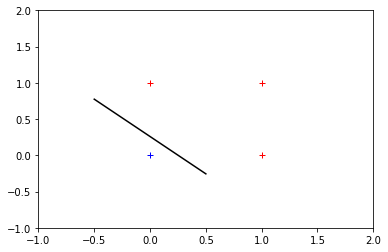

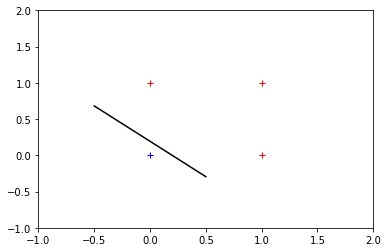

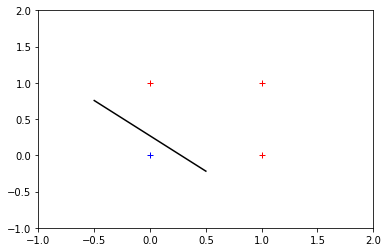

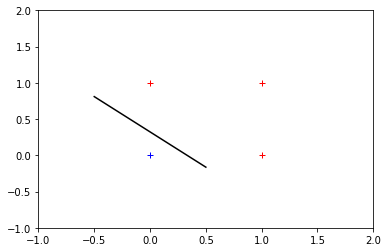

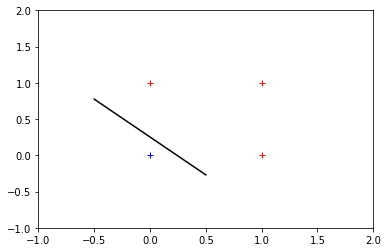

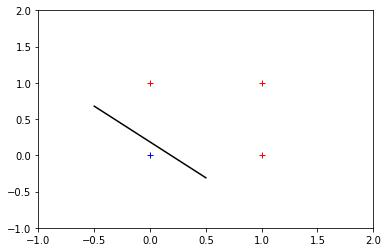

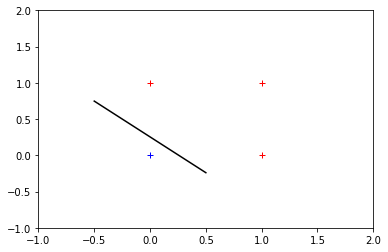

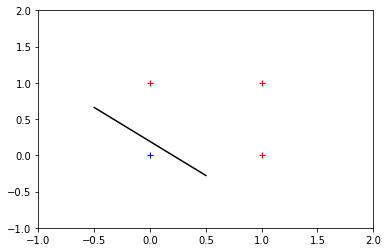

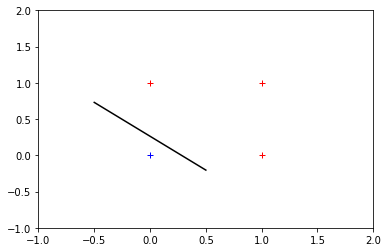

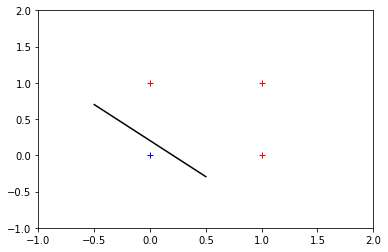

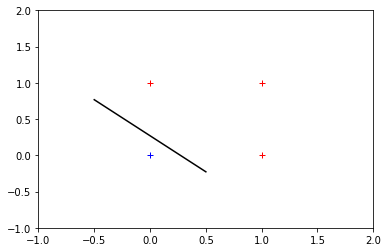

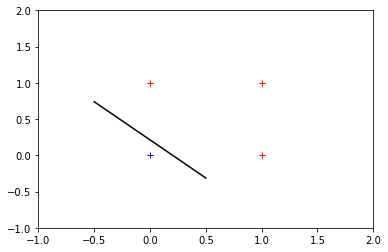

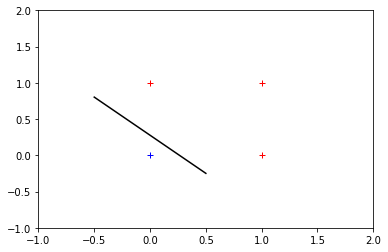

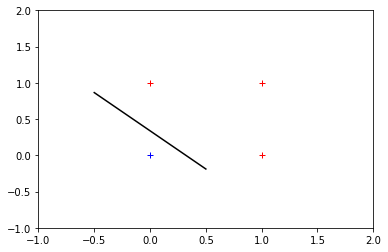

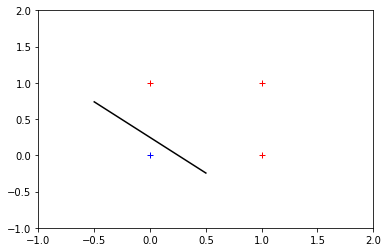

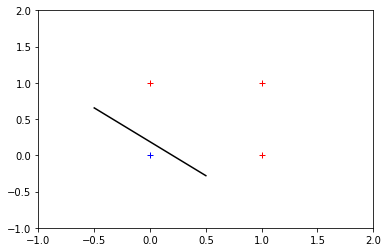

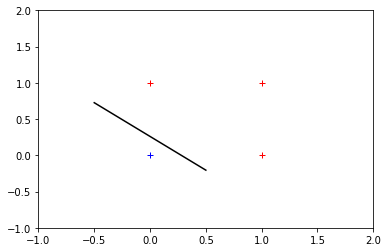

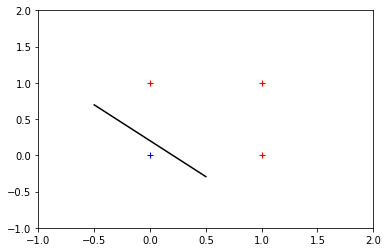

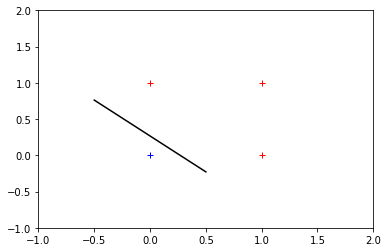

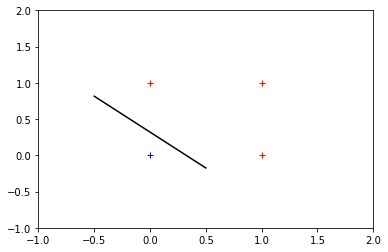

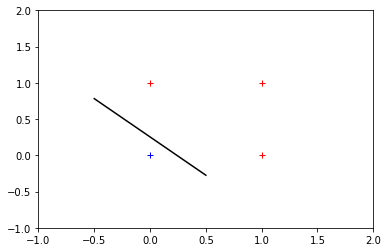

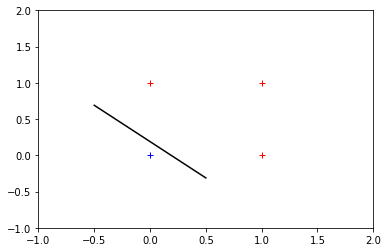

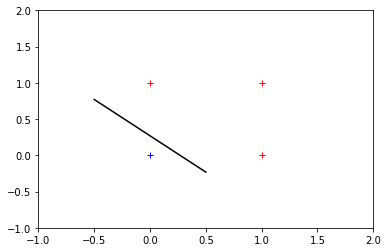

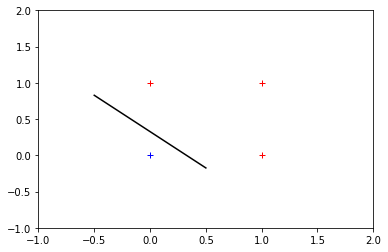

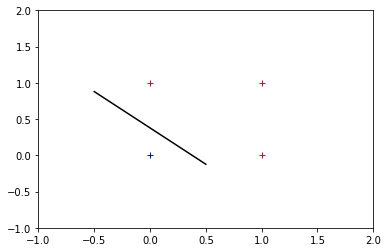

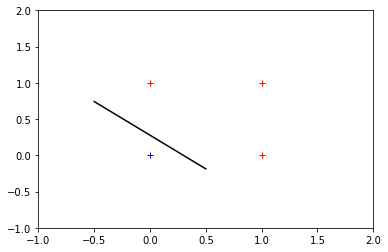

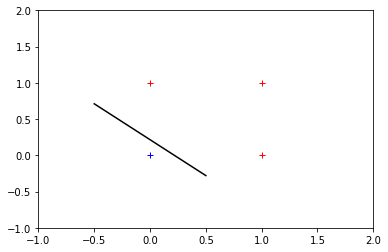

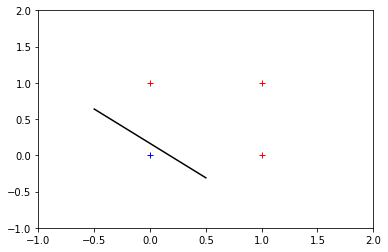

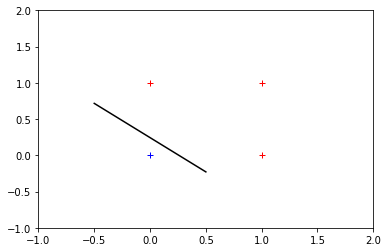

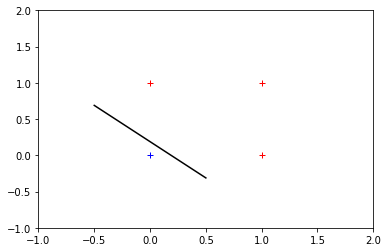

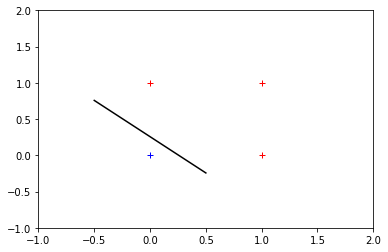

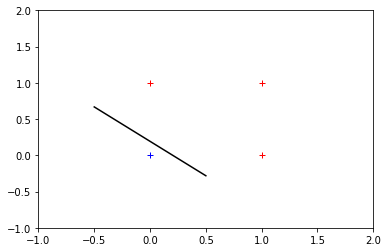

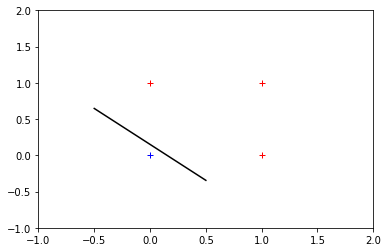

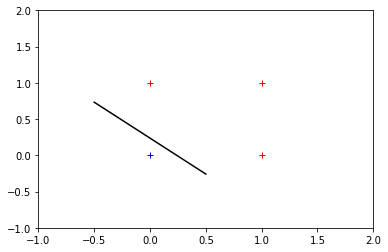

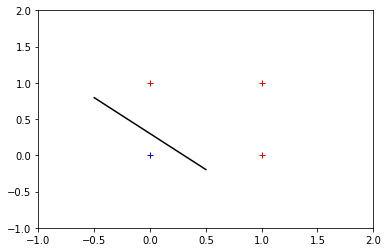

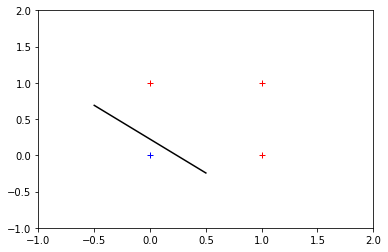

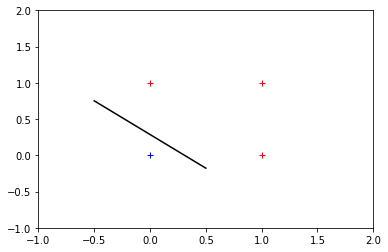

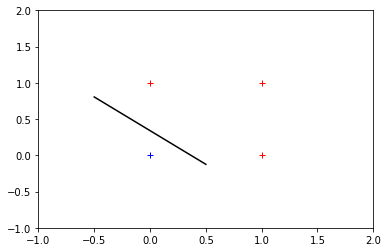

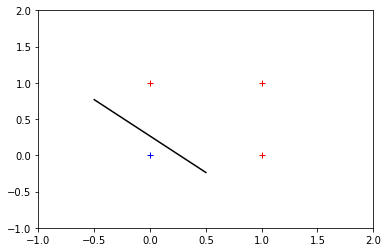

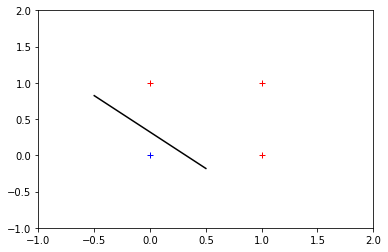

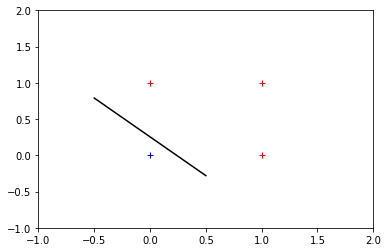

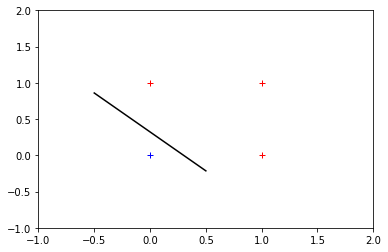

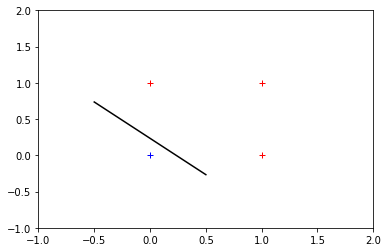

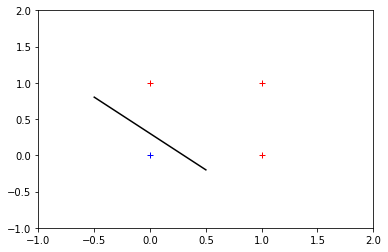

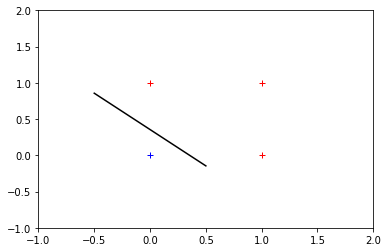

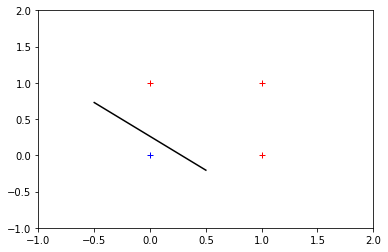

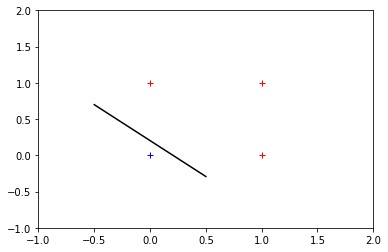

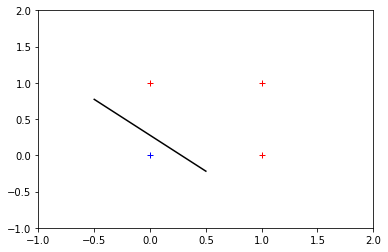

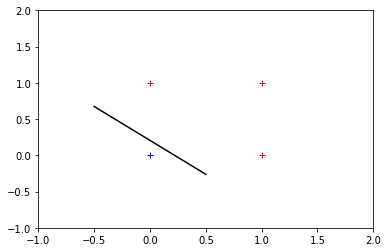

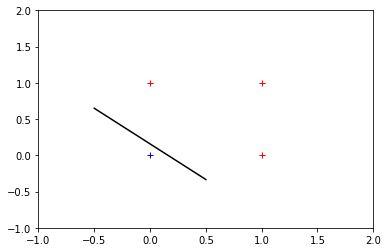

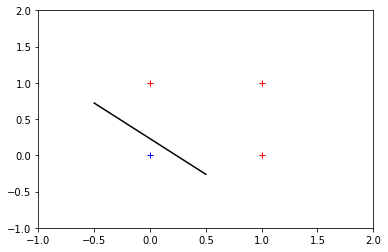

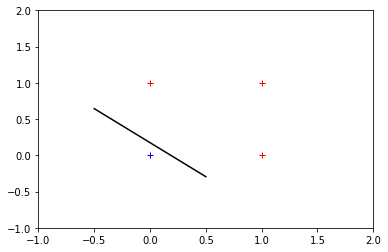

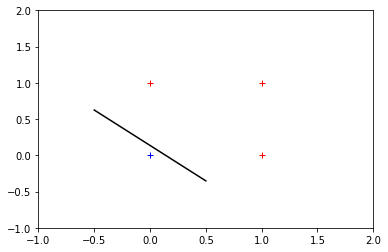

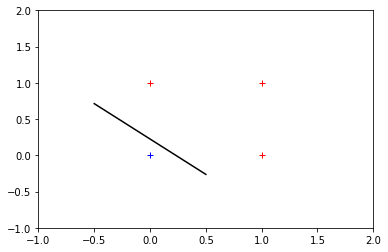

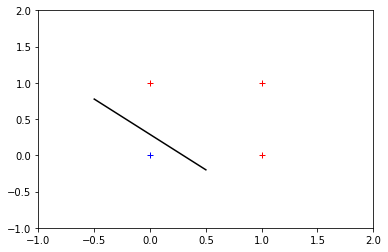

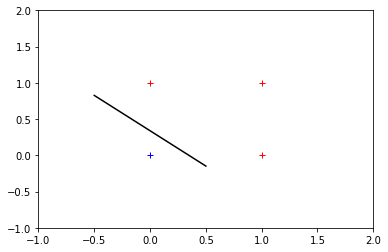

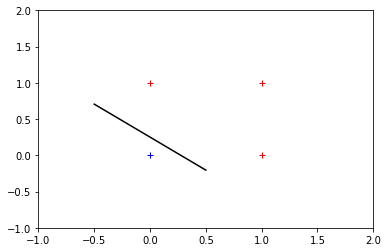

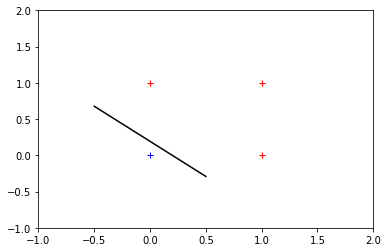

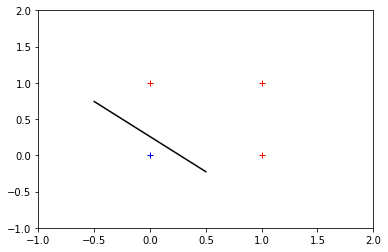

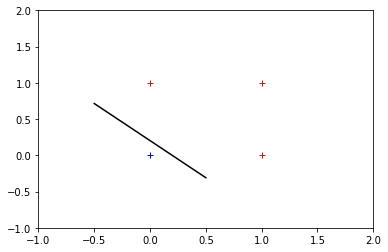

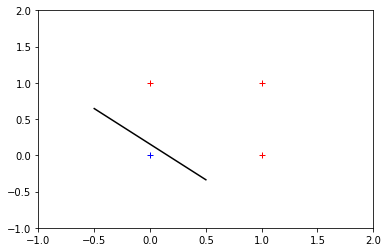

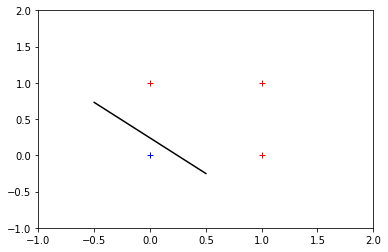

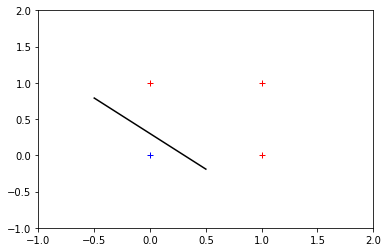

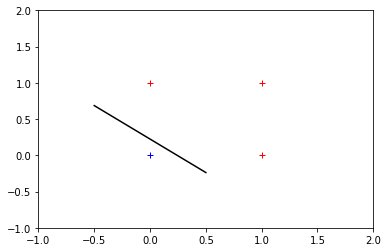

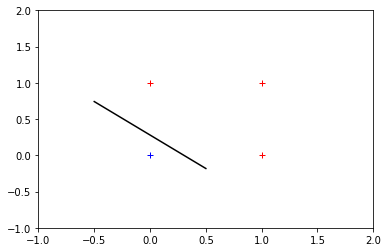

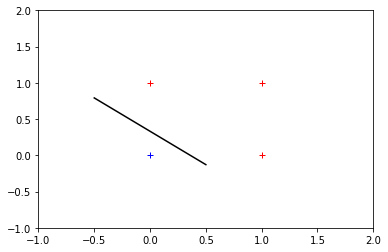

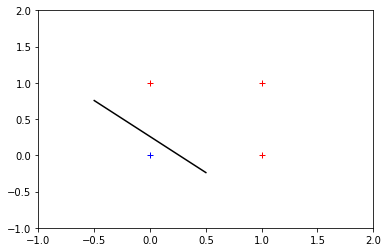

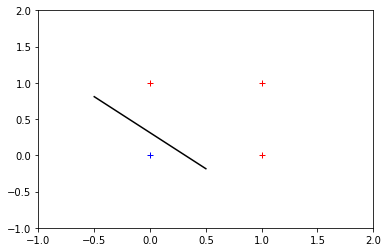

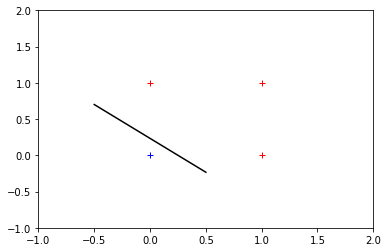

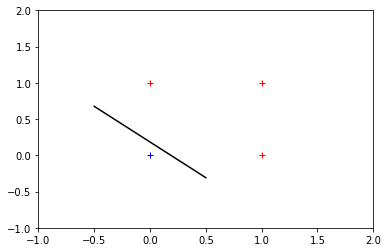

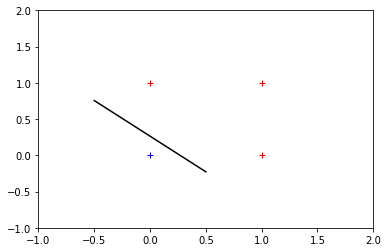

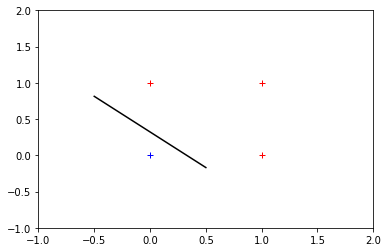

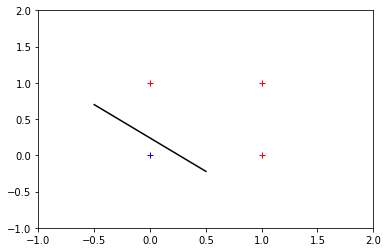

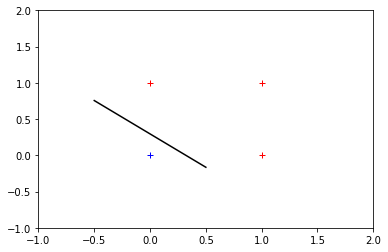

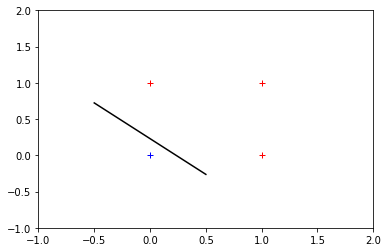

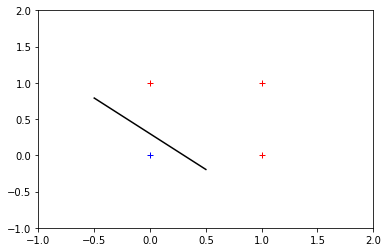

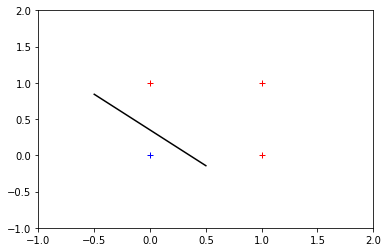

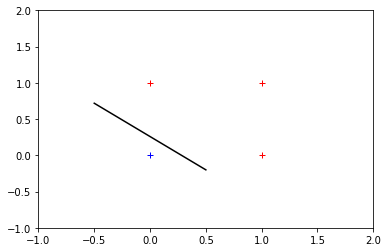

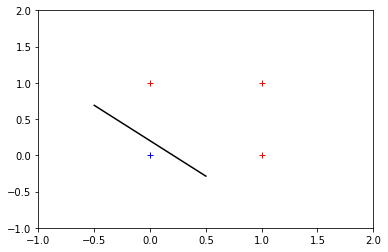

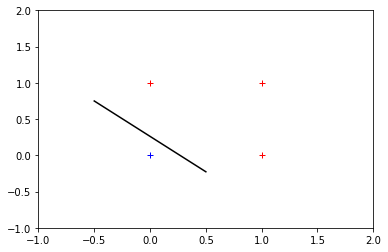

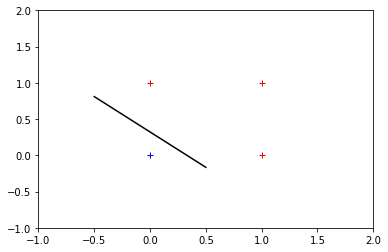

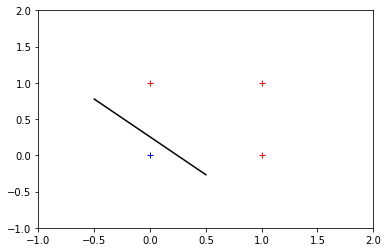

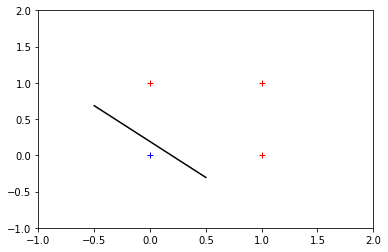

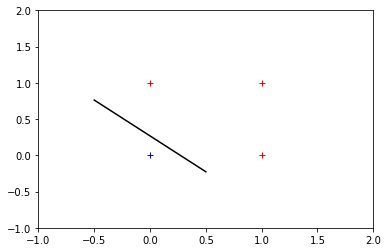

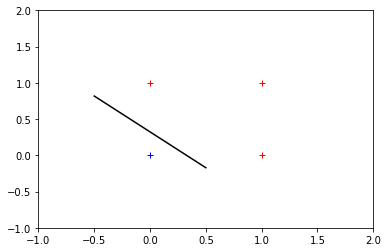

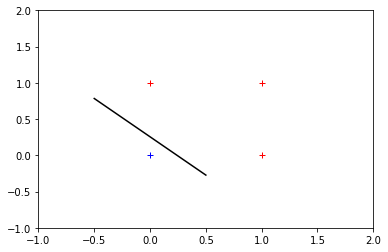

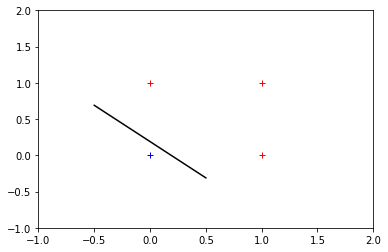

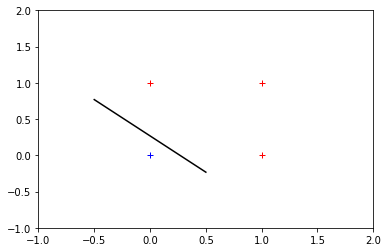

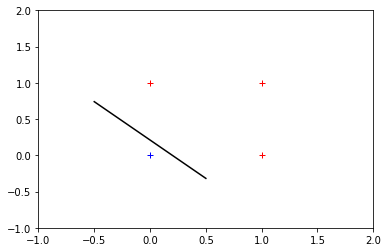

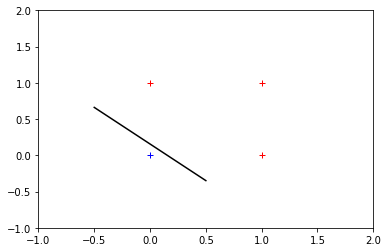

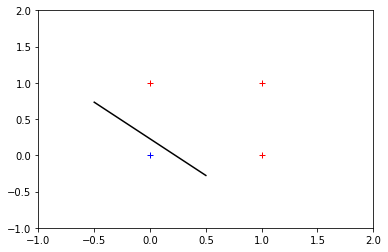

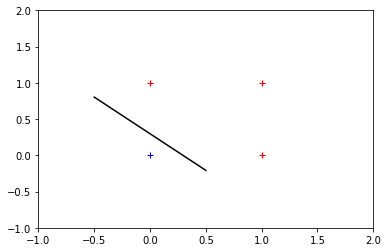

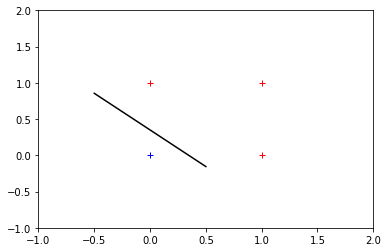

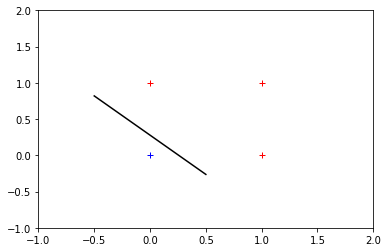

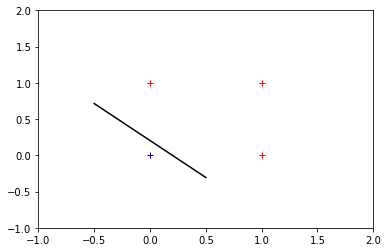

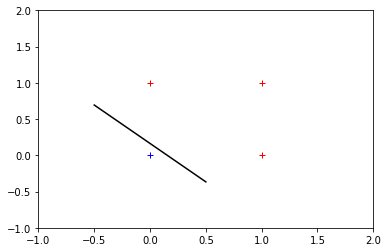

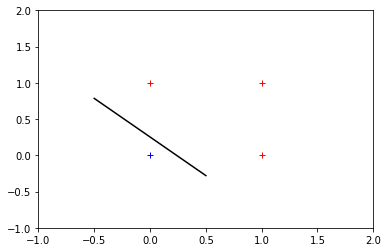

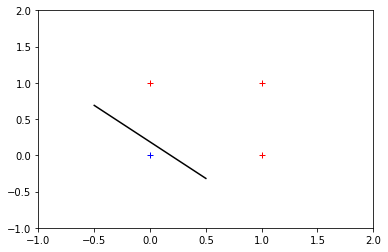

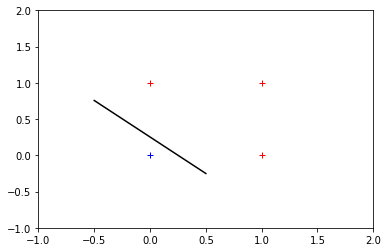

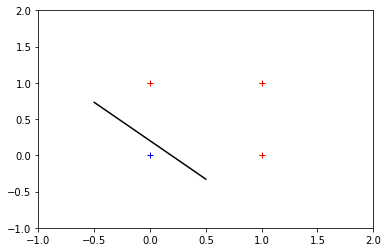

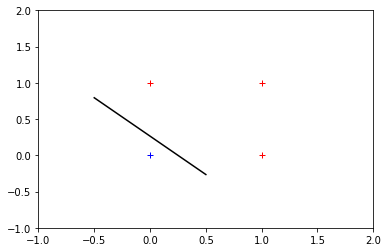

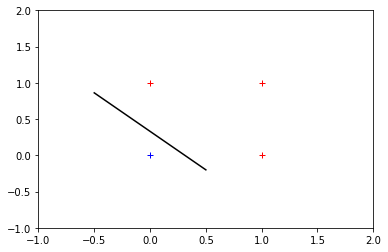

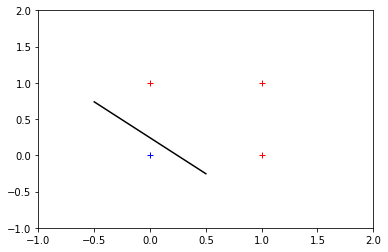

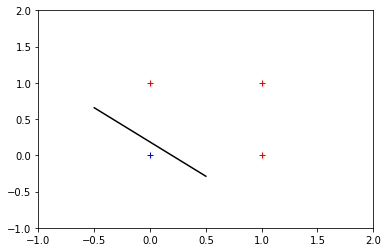

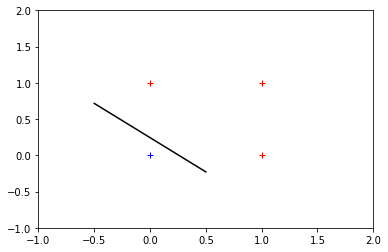

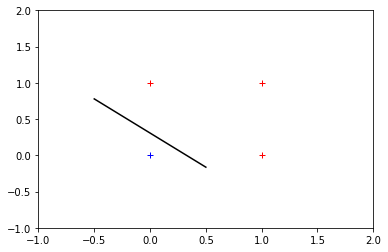

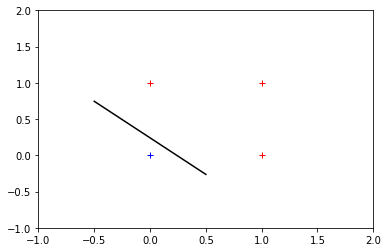

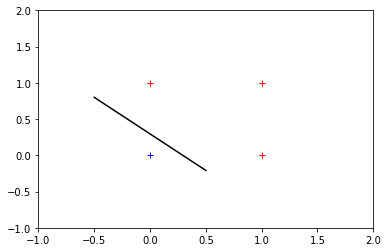

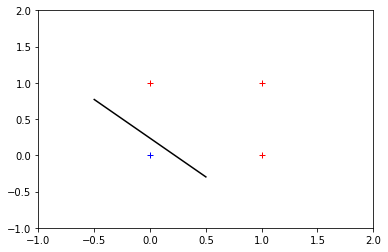

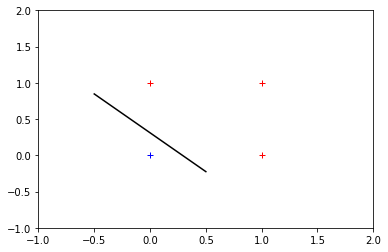

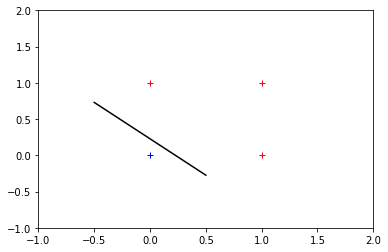

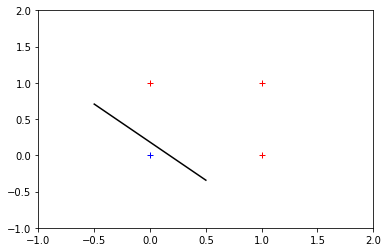

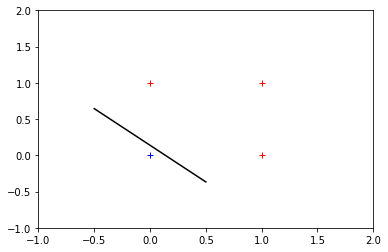

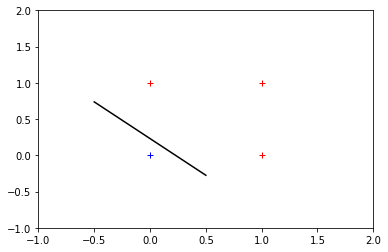

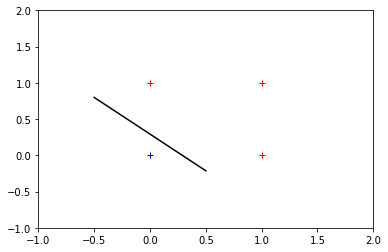

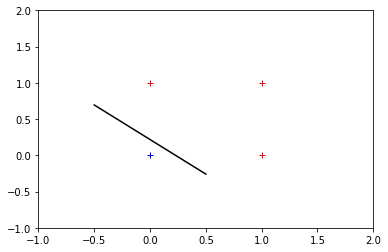

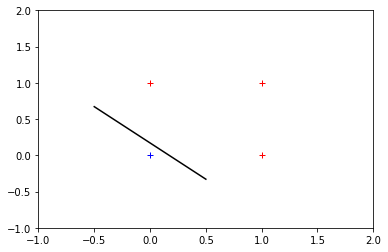

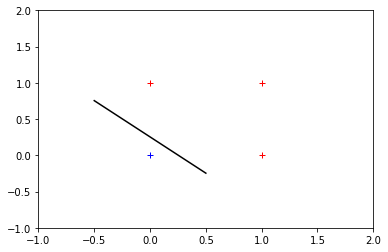

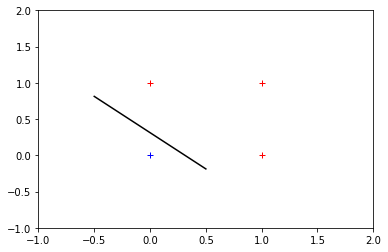

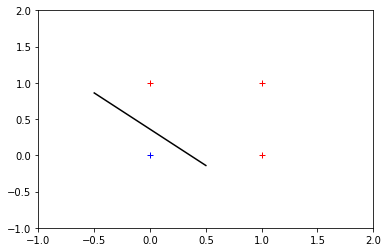

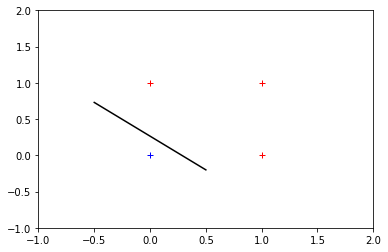

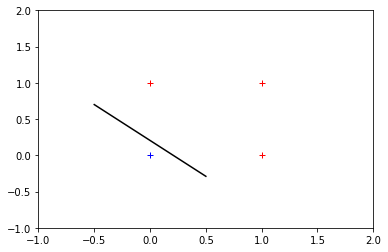

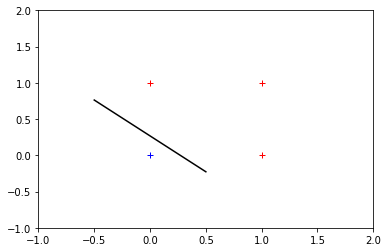

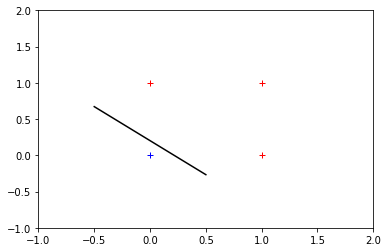

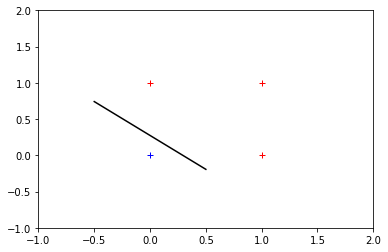

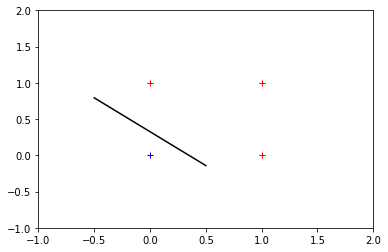

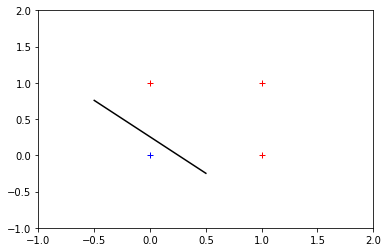

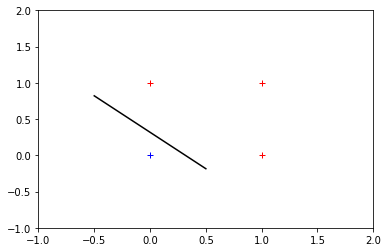

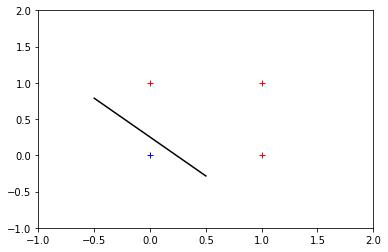

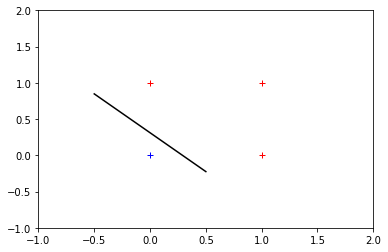

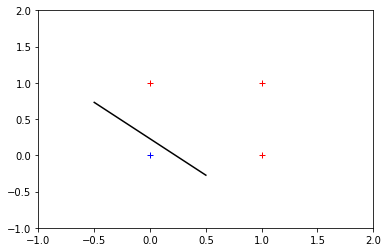

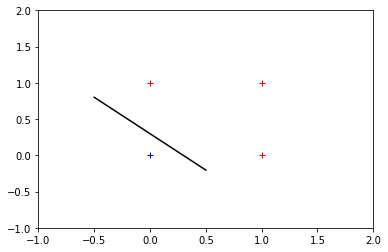

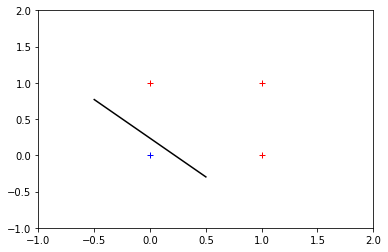

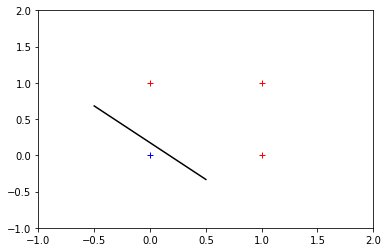

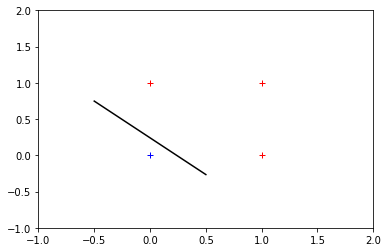

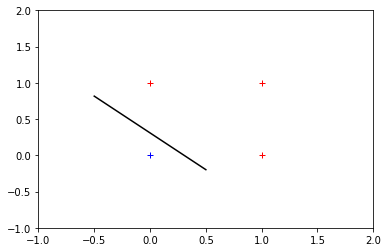

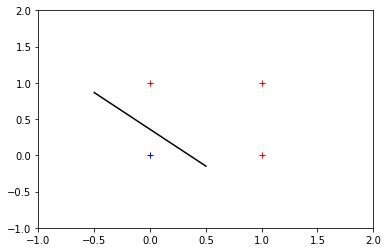

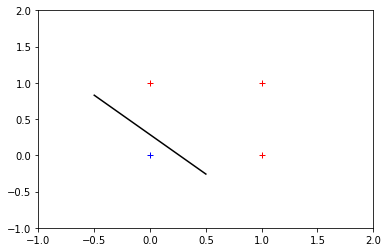

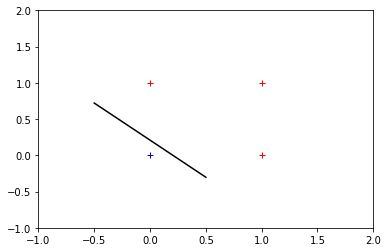

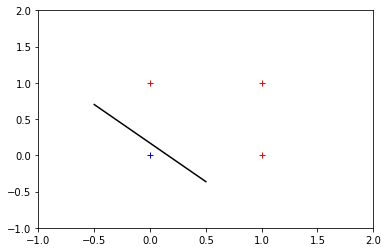

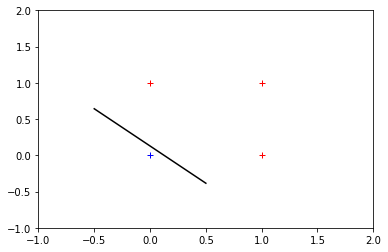

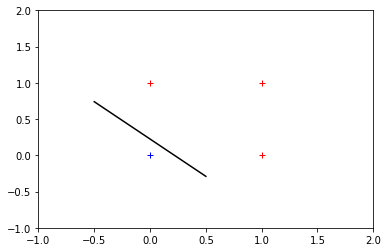

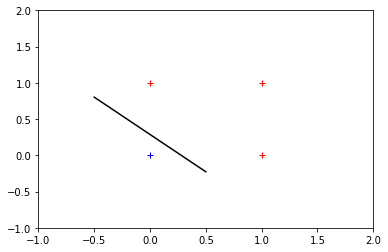

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([-1,1,1,1])
algoritmul_widrow_hoff(x,y,70,0.1)

#### Exercitiul 3

Pentru exercitiul 3 putem vedea ca perceptronul nu mai este capabil sa invete o functie de decizie suficient de complexa pentru a discrimina setul de antrenare.

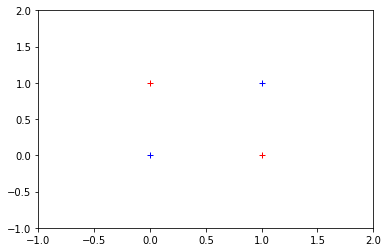

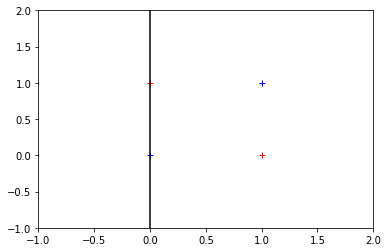

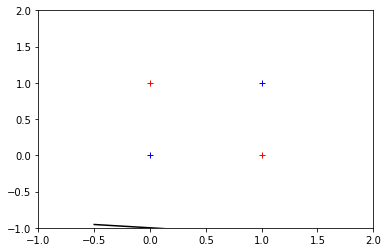

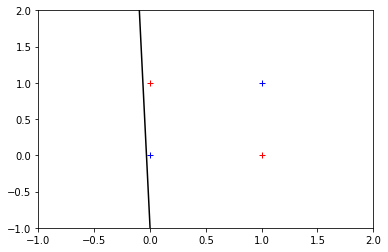

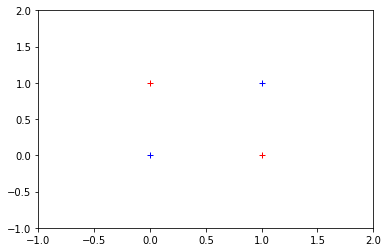

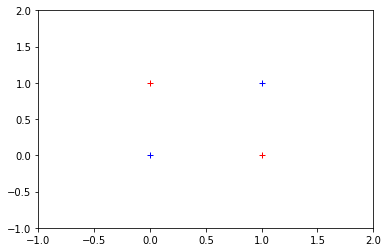

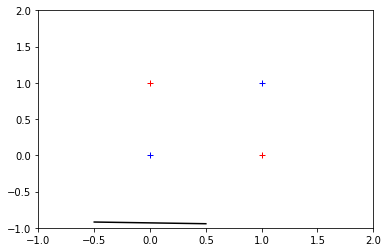

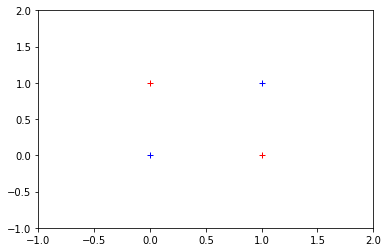

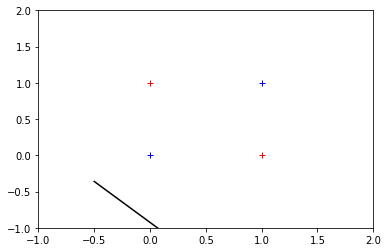

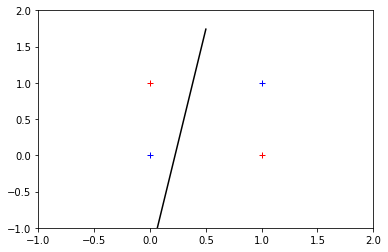

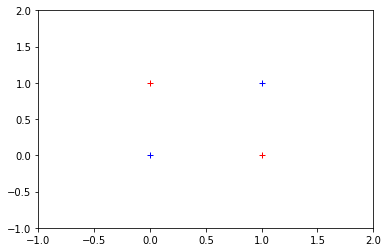

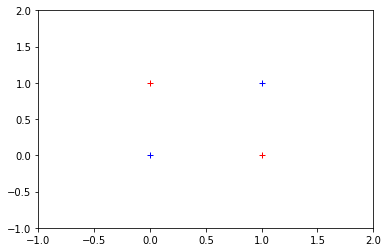

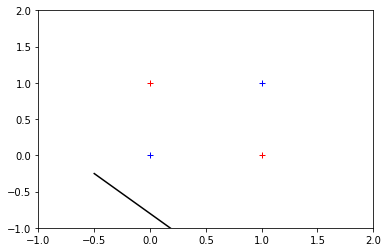

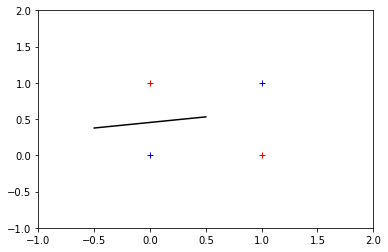

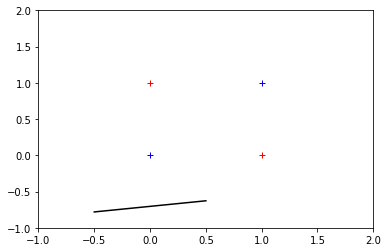

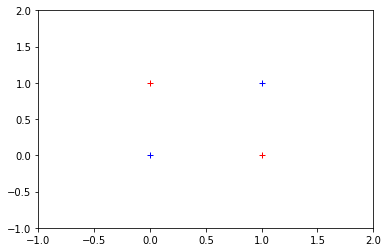

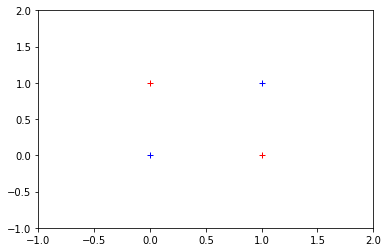

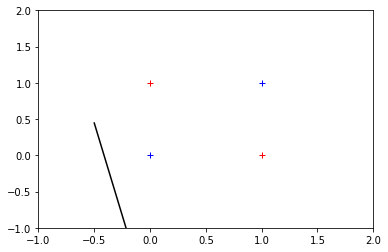

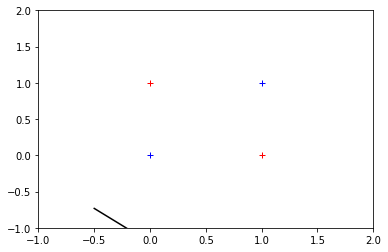

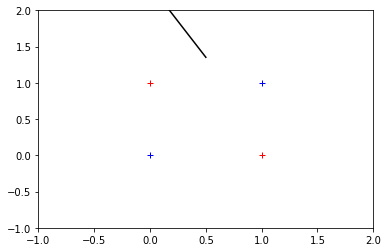

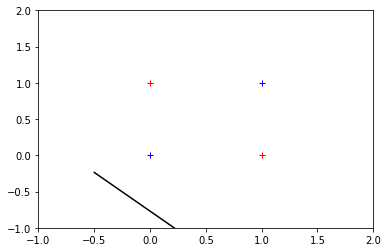

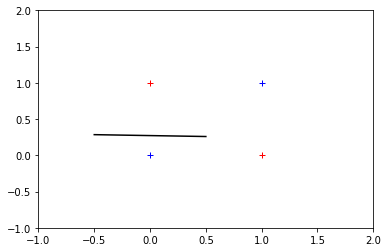

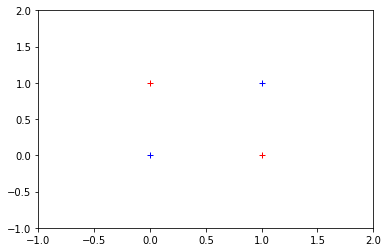

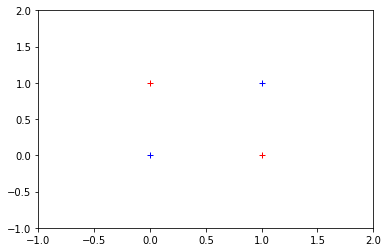

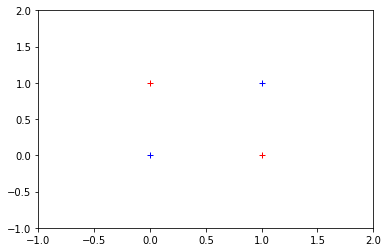

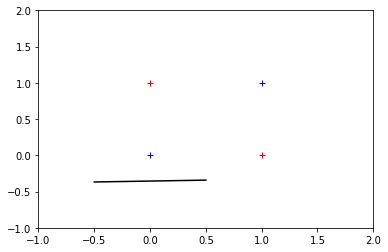

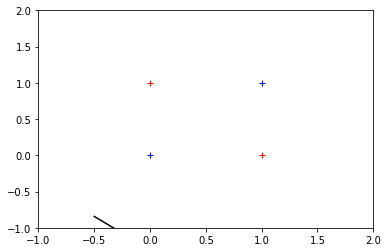

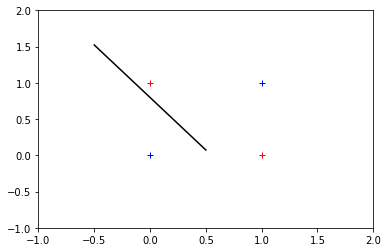

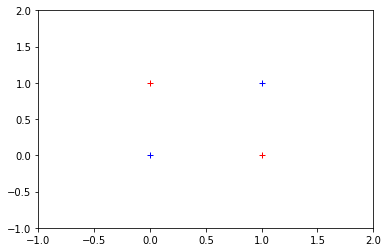

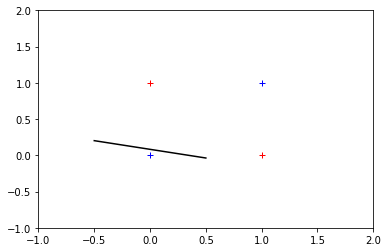

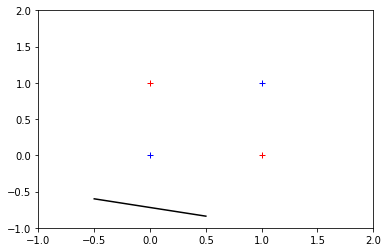

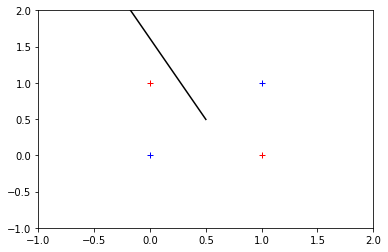

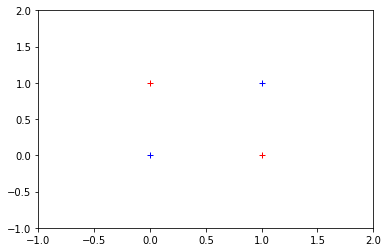

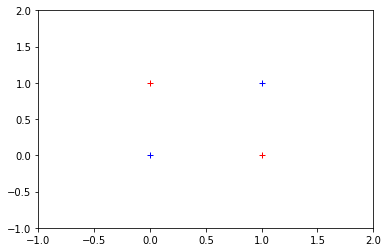

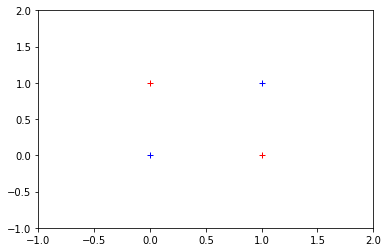

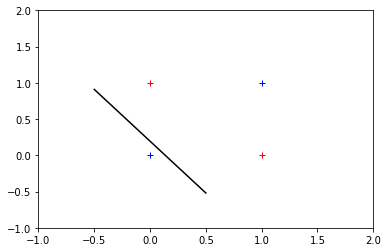

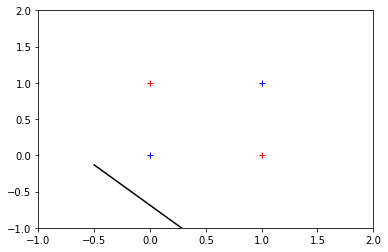

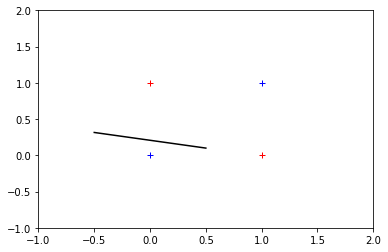

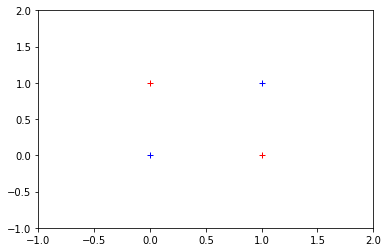

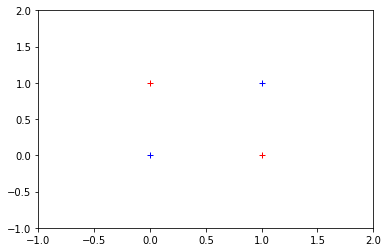

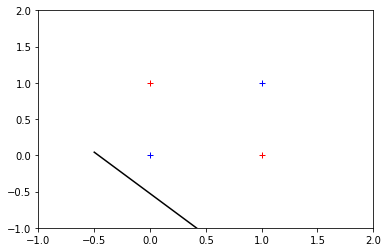

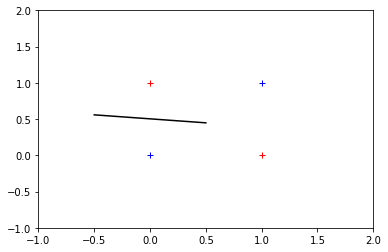

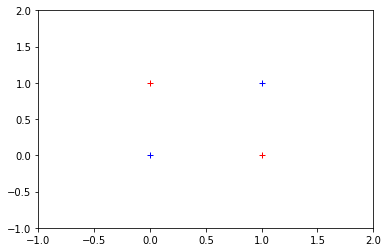

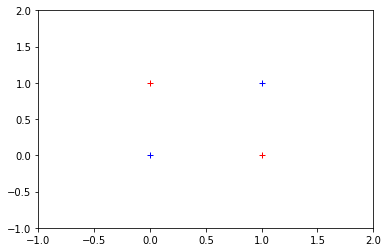

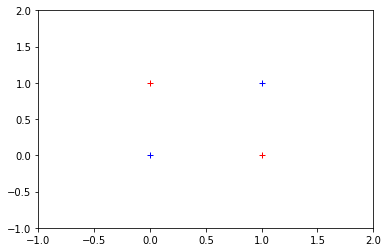

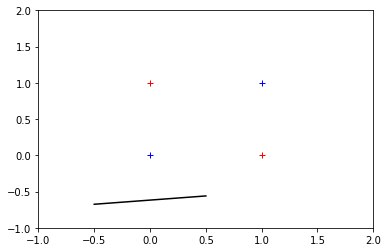

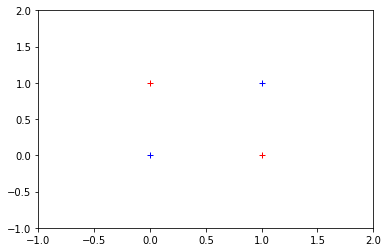

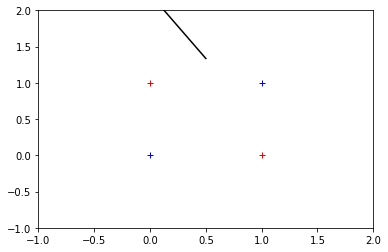

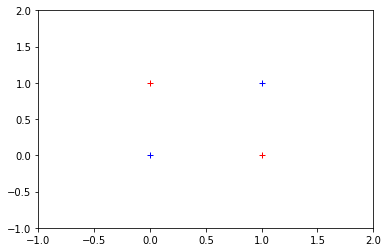

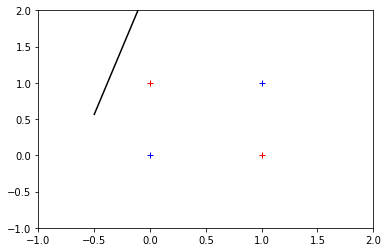

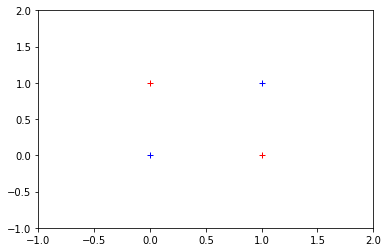

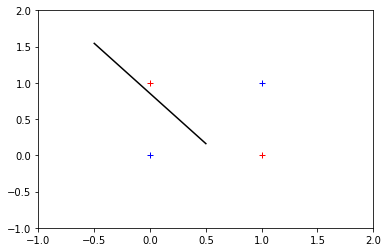

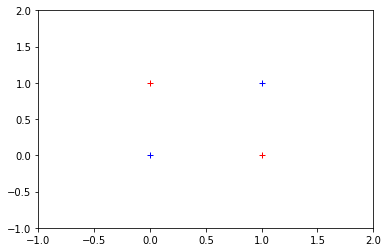

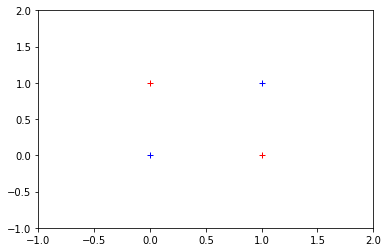

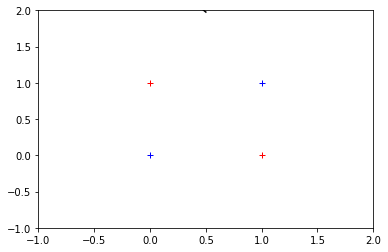

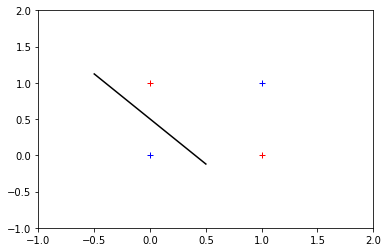

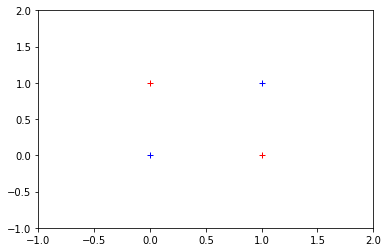

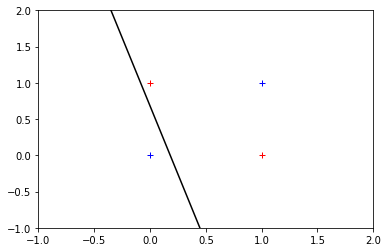

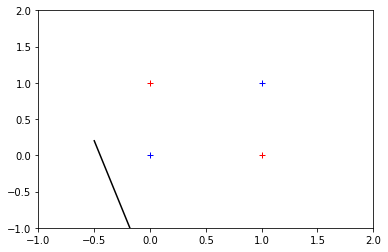

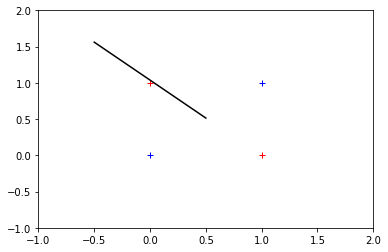

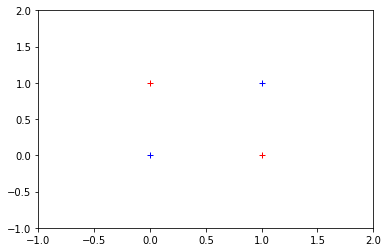

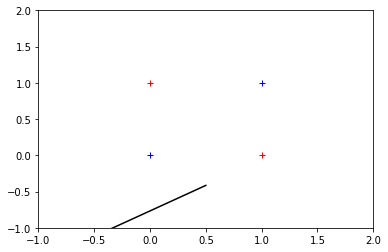

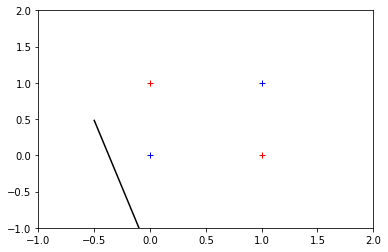

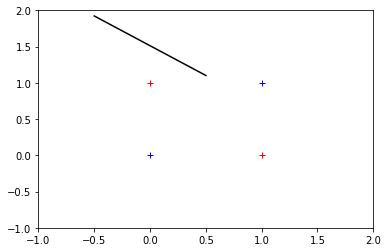

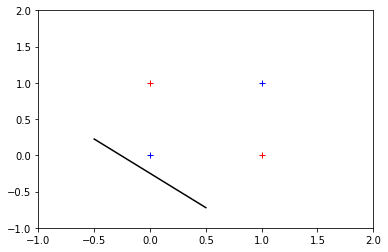

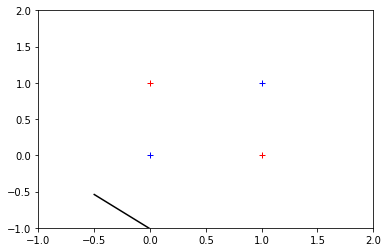

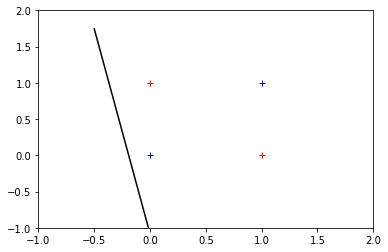

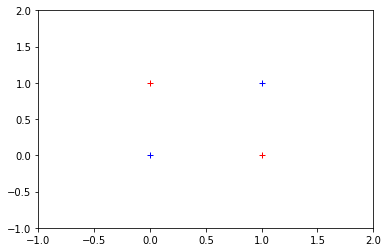

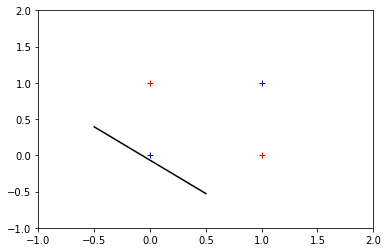

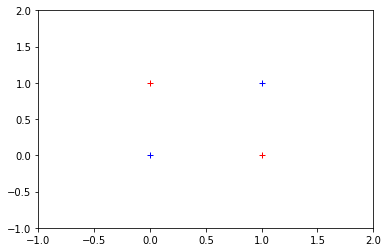

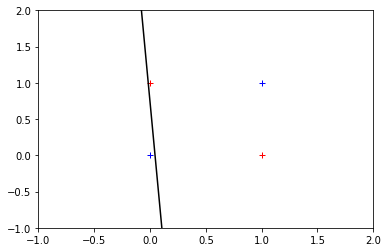

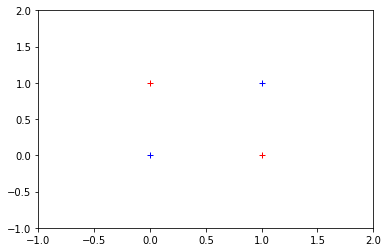

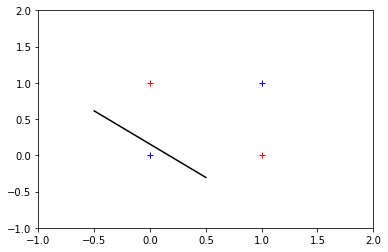

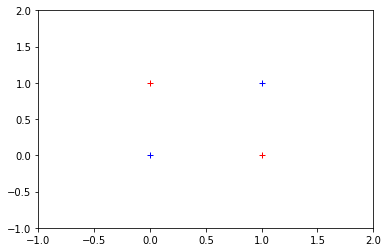

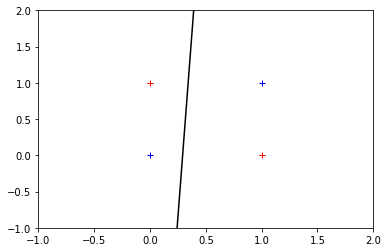

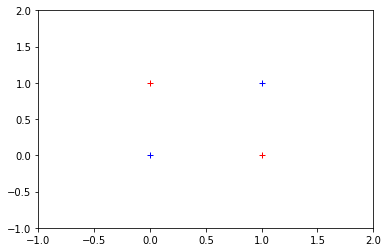

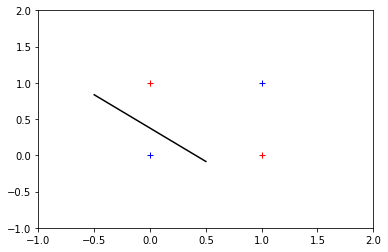

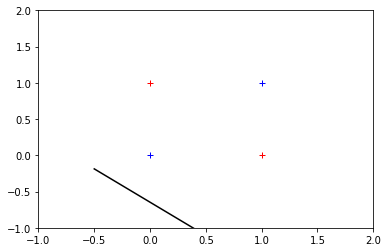

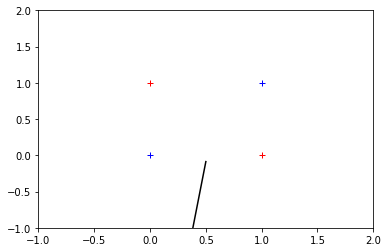

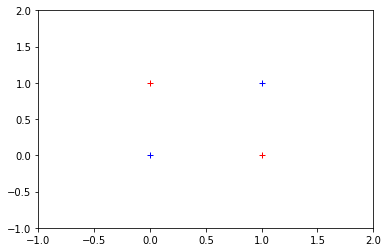

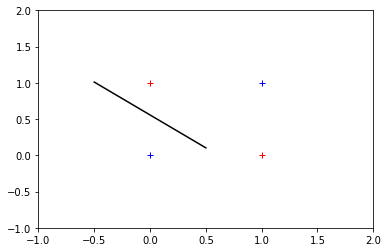

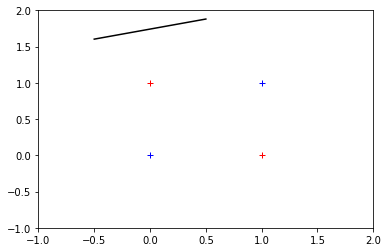

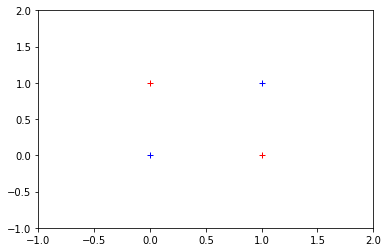

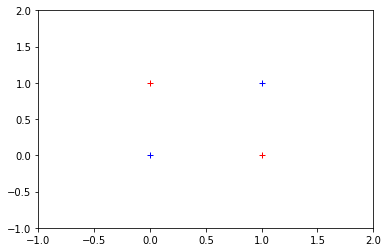

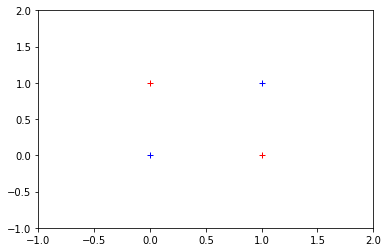

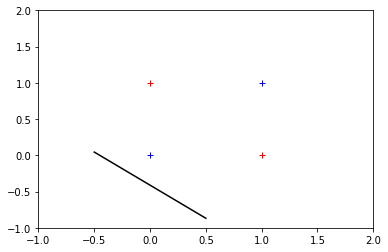

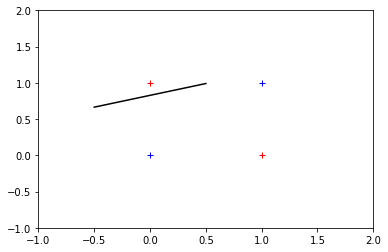

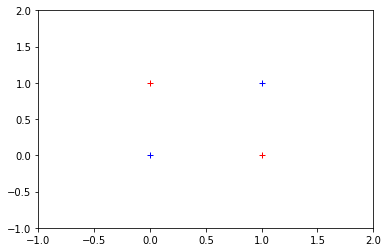

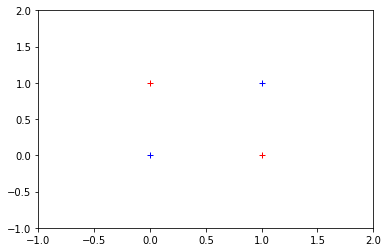

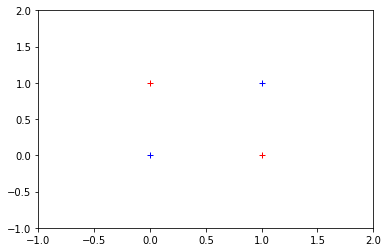

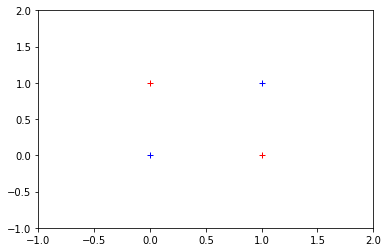

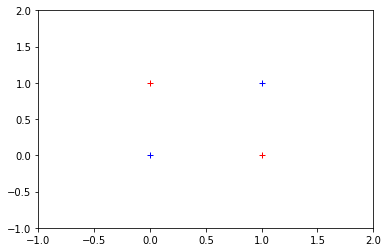

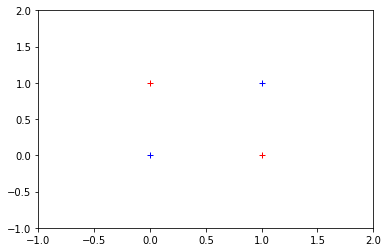

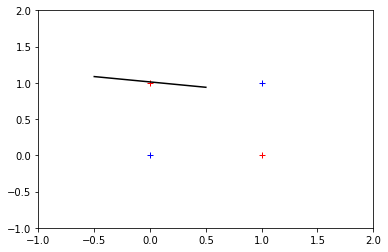

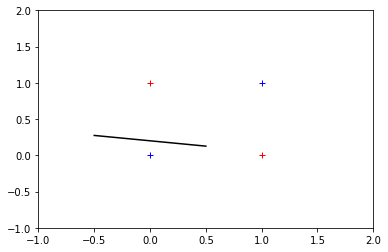

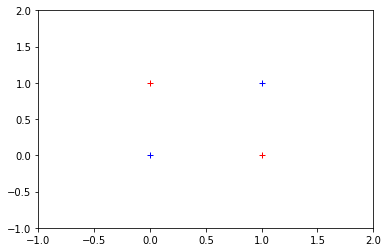

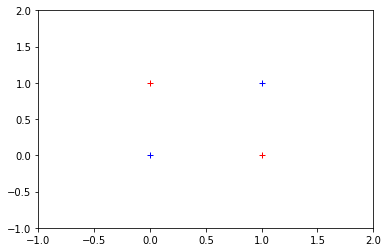

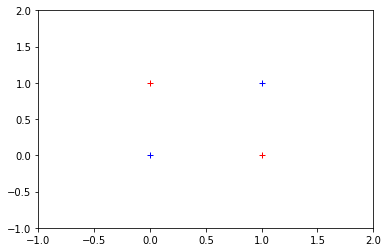

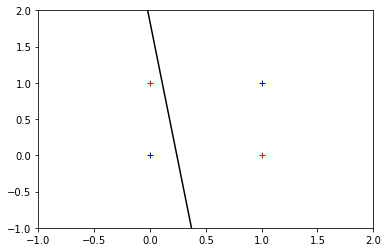

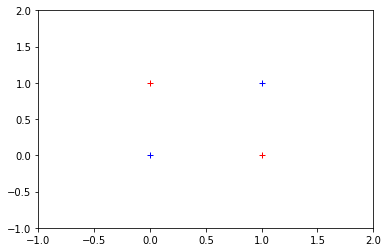

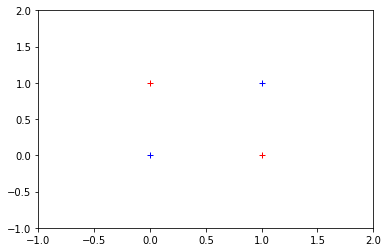

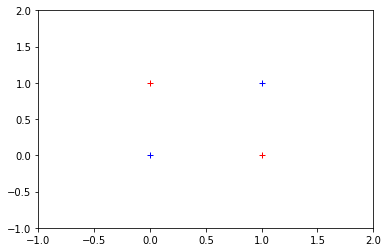

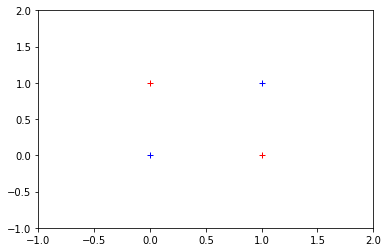

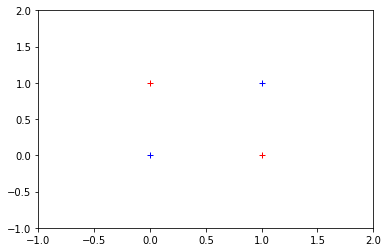

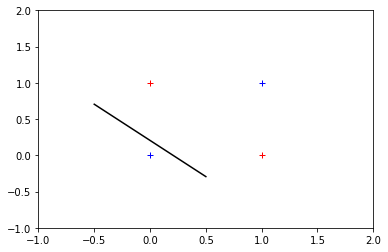

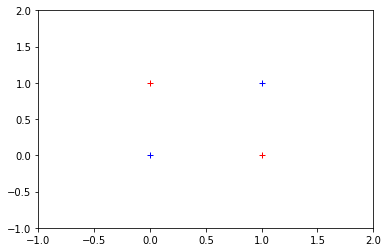

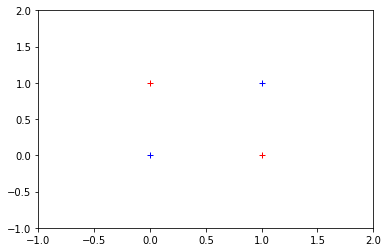

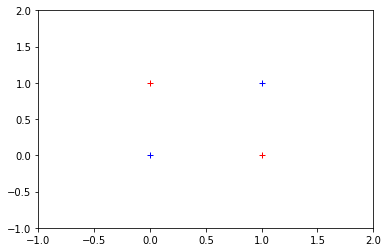

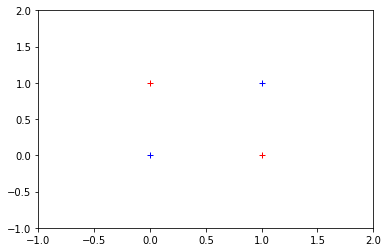

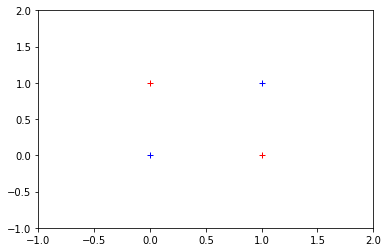

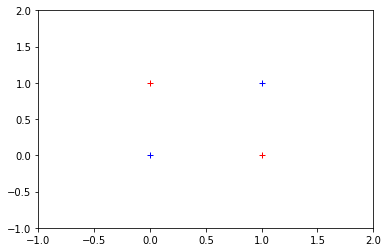

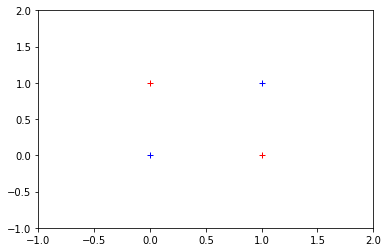

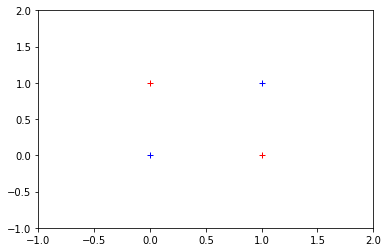

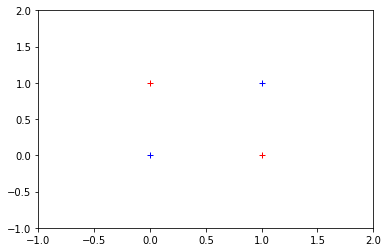

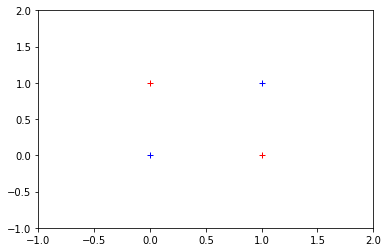

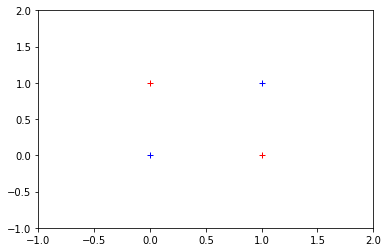

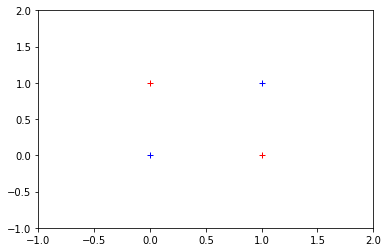

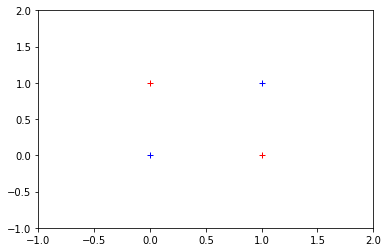

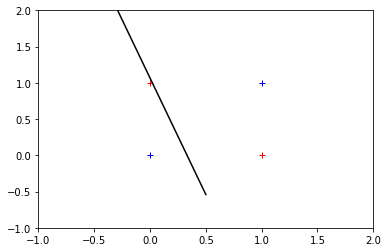

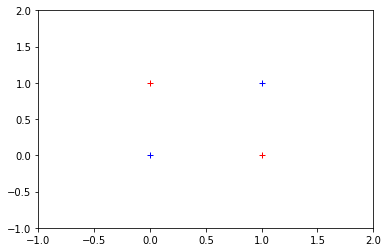

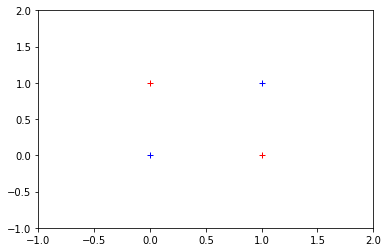

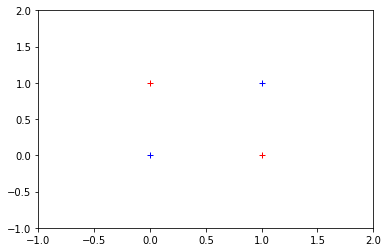

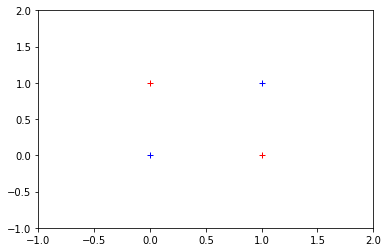

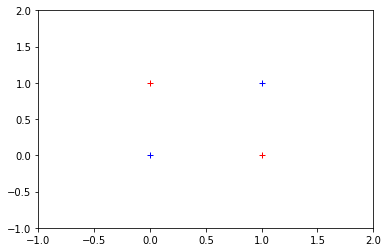

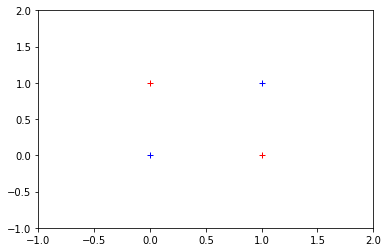

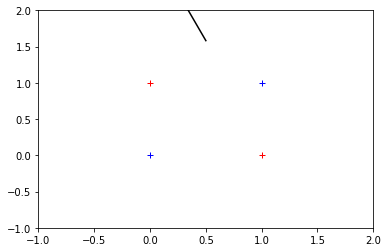

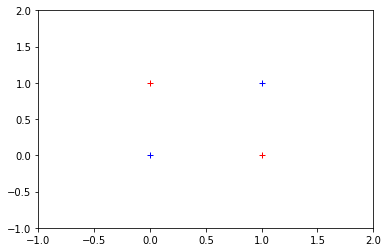

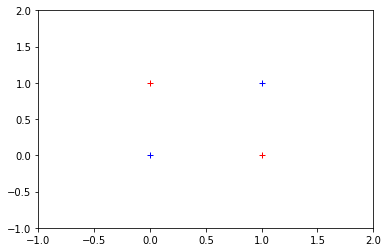

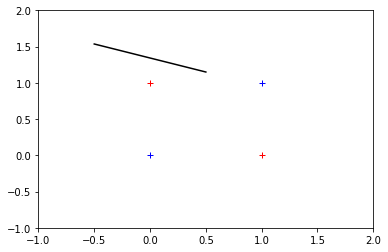

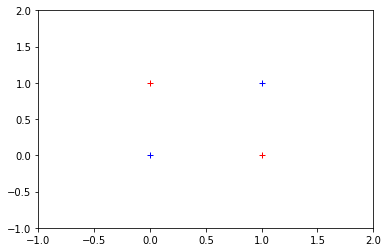

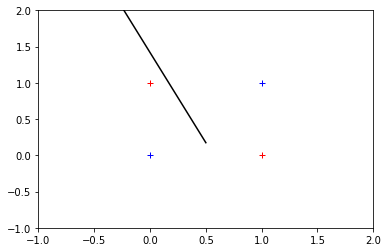

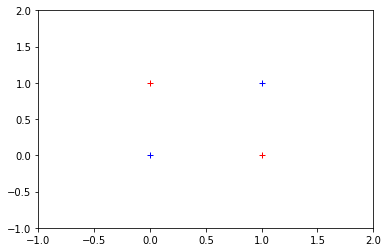

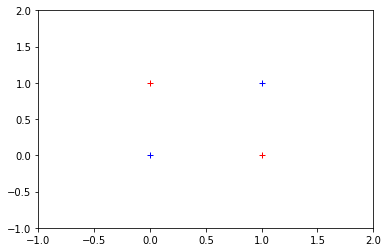

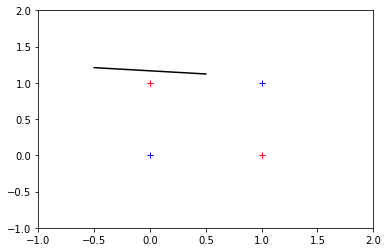

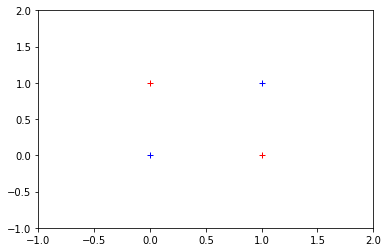

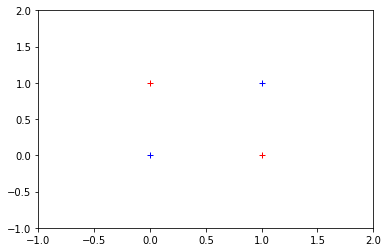

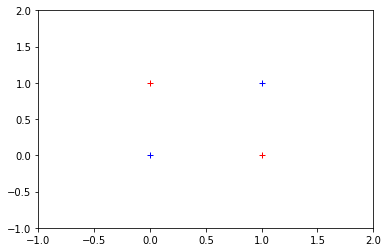

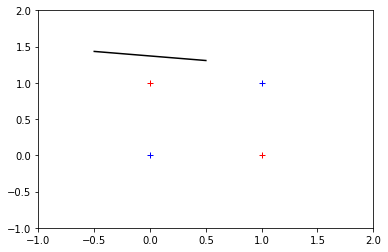

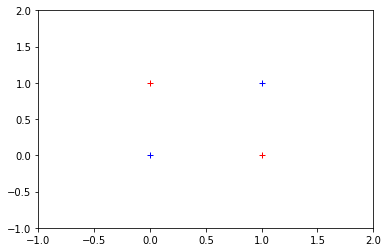

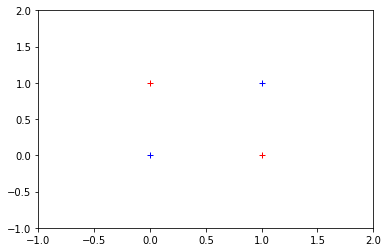

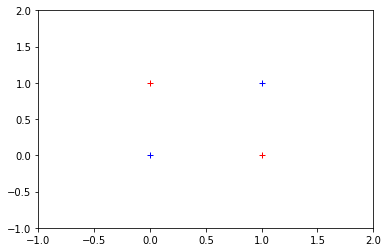

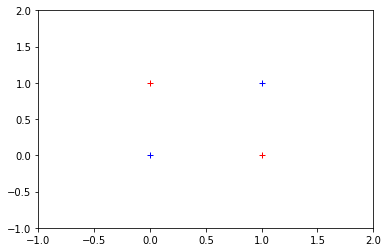

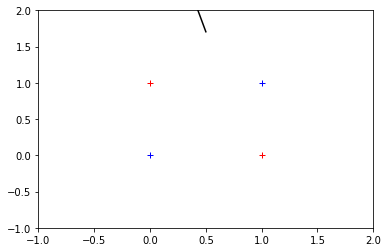

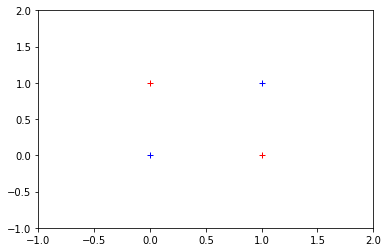

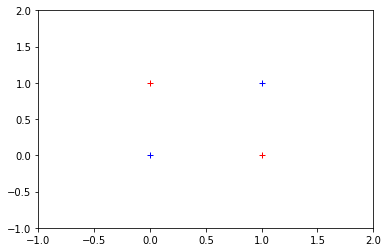

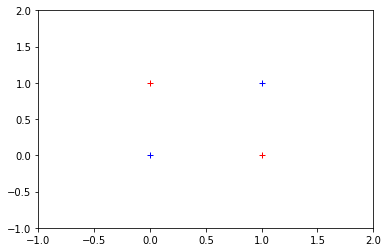

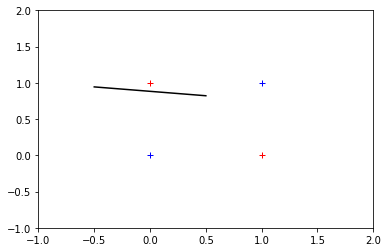

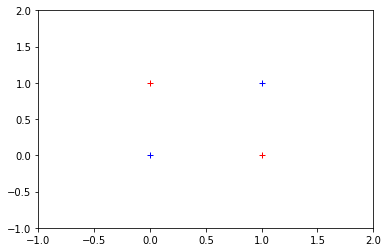

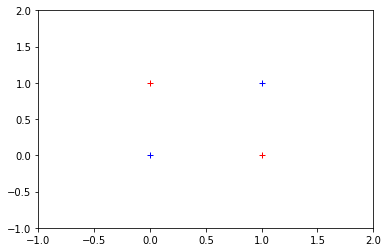

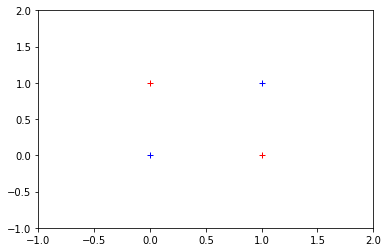

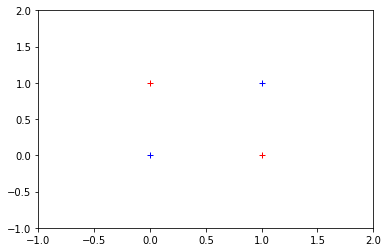

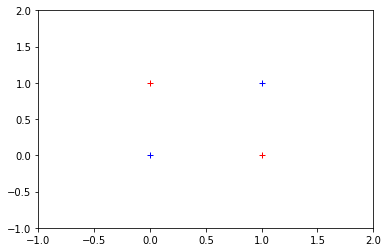

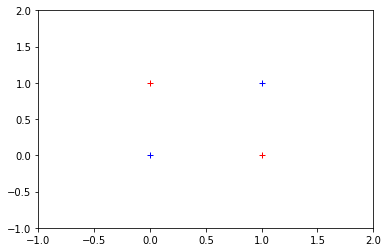

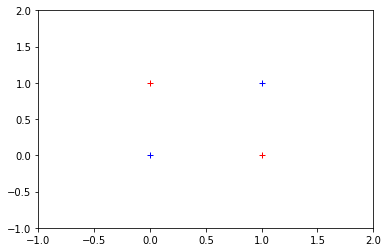

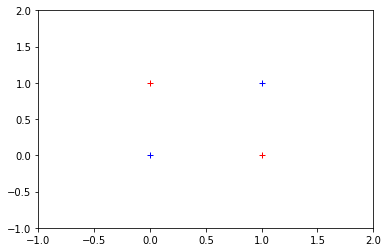

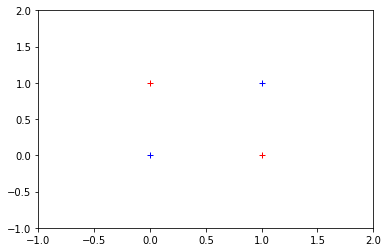

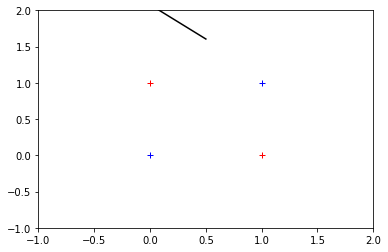

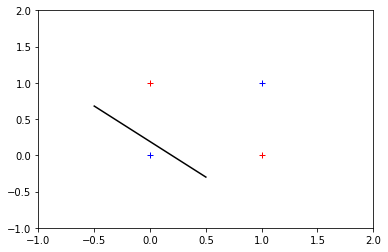

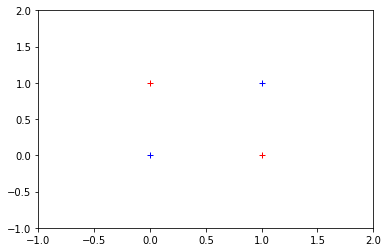

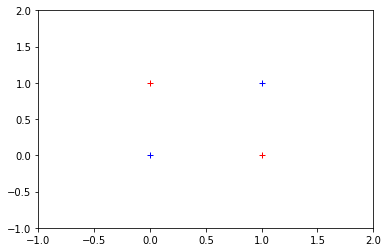

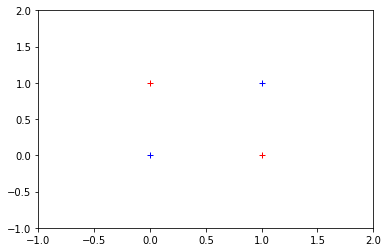

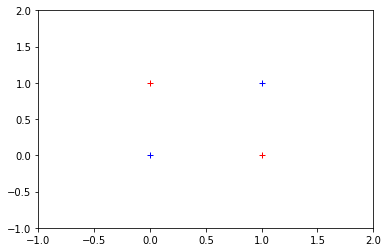

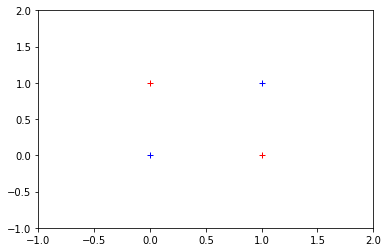

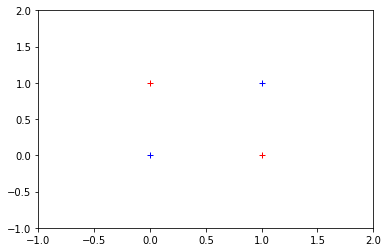

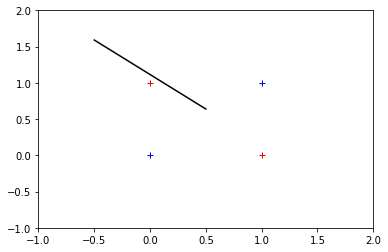

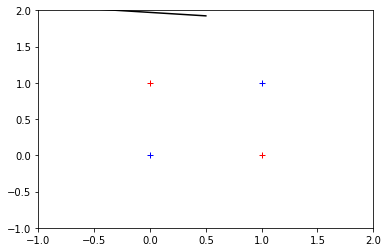

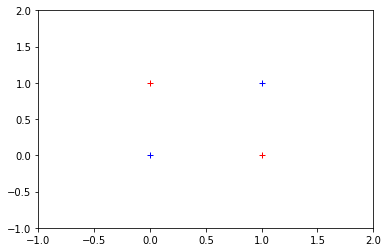

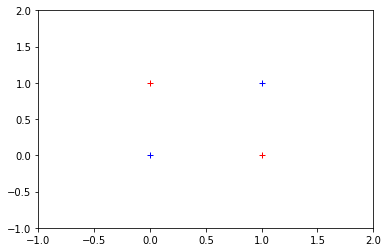

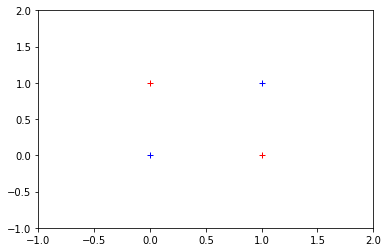

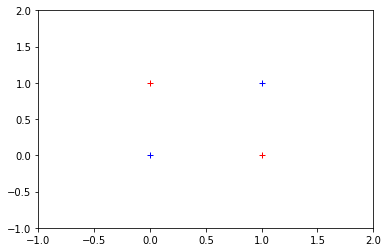

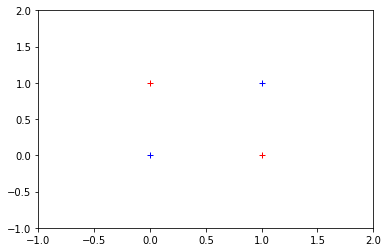

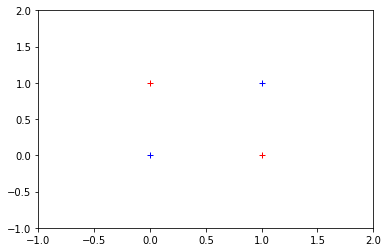

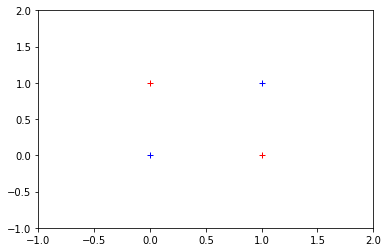

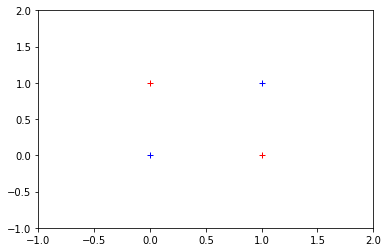

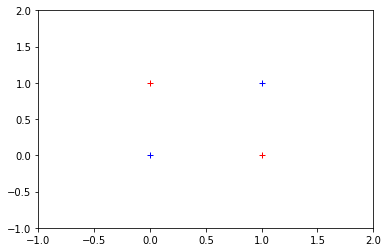

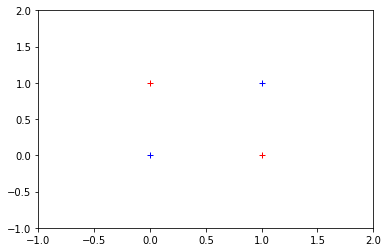

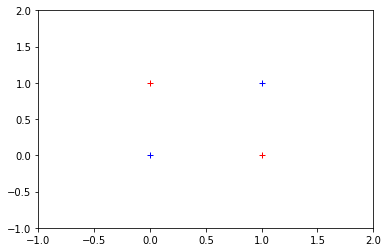

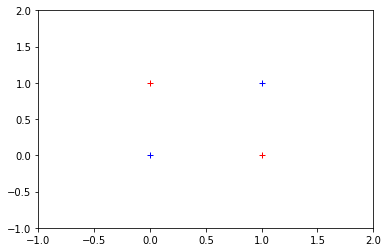

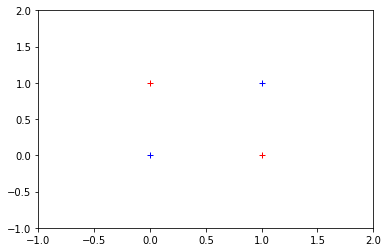

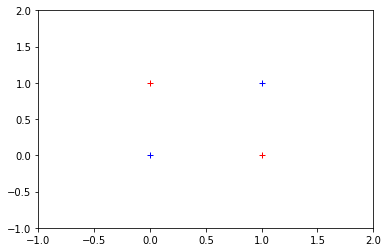

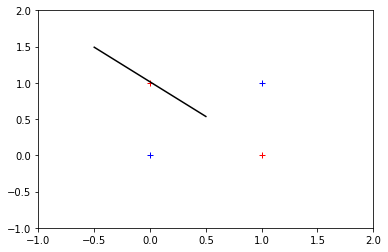

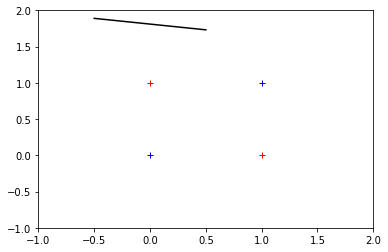

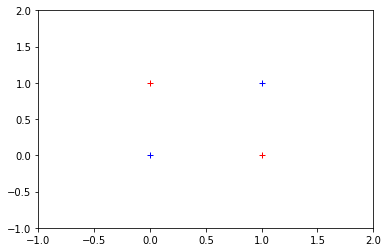

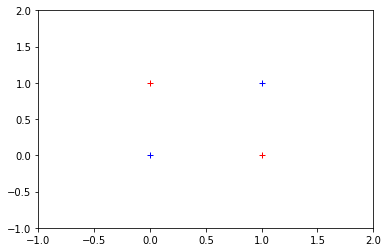

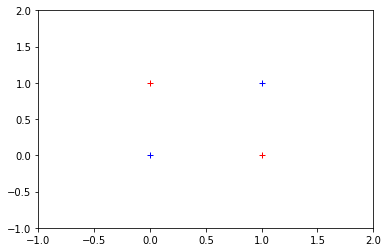

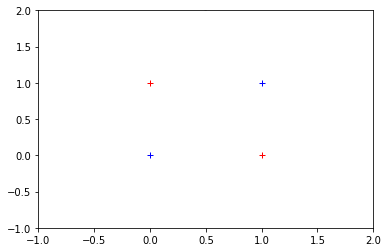

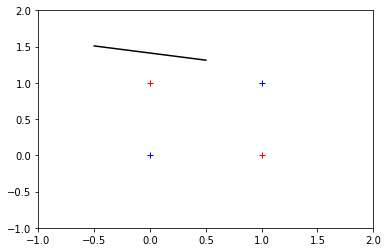

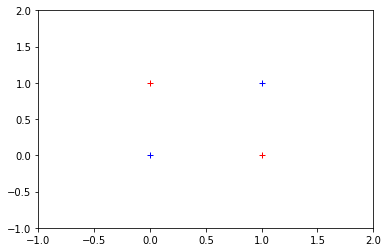

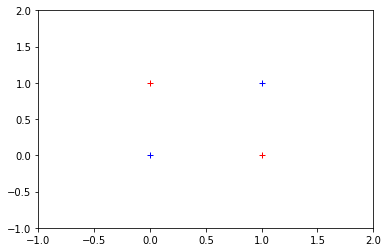

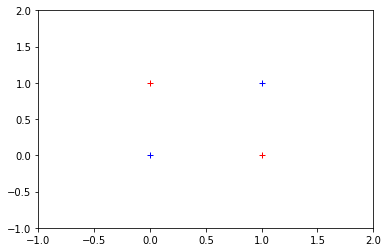

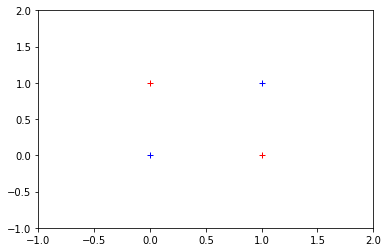

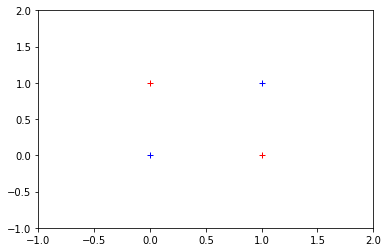

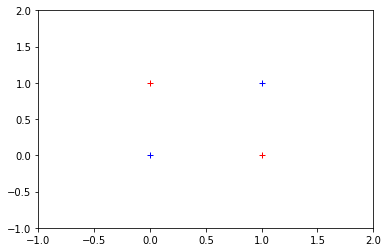

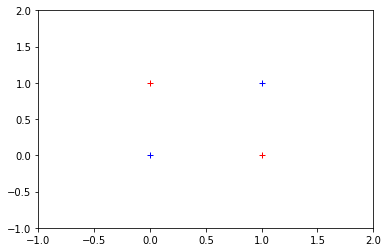

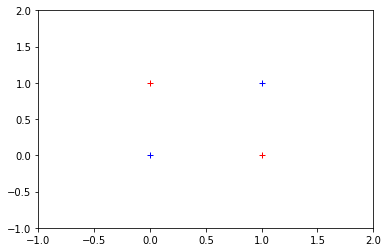

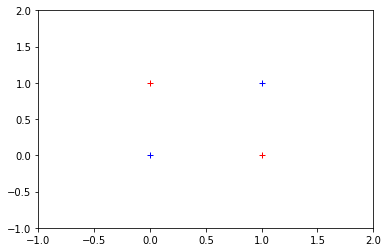

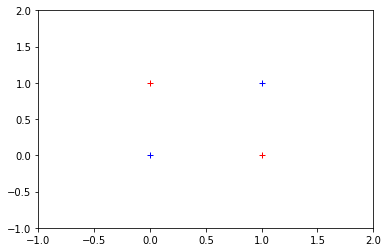

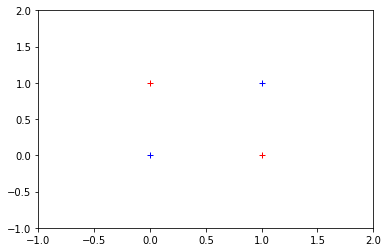

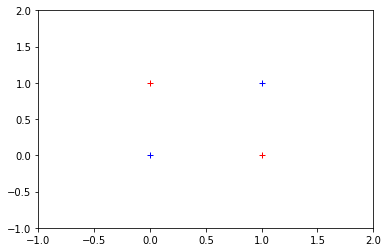

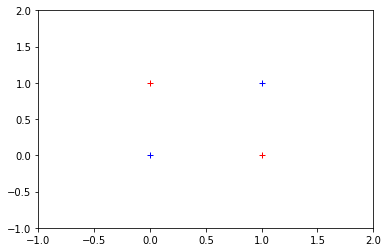

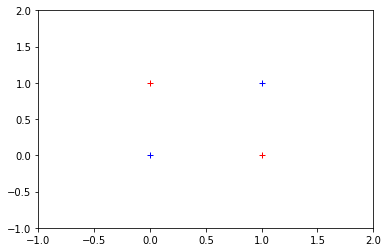

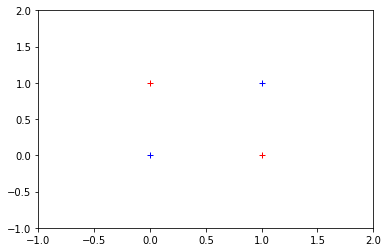

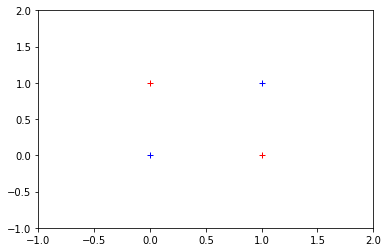

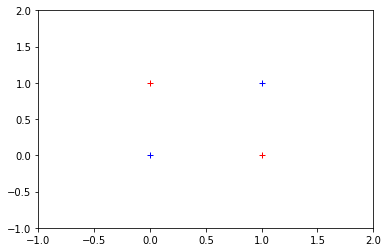

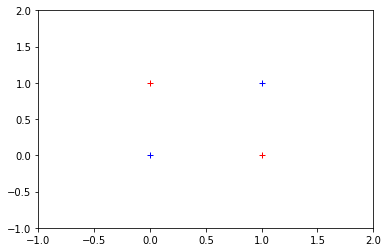

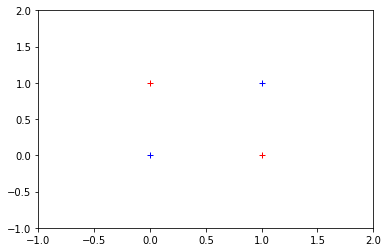

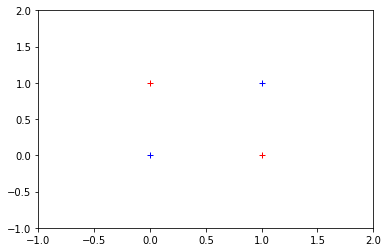

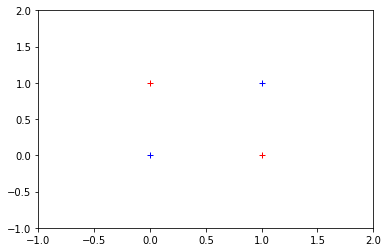

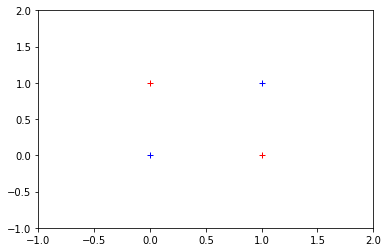

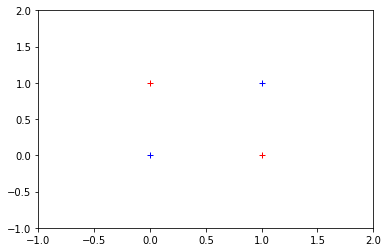

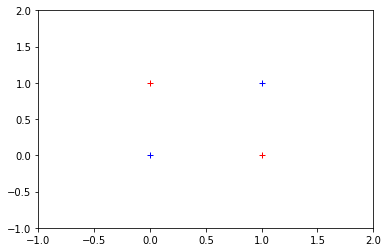

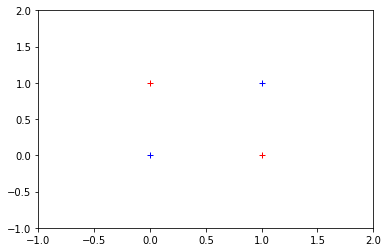

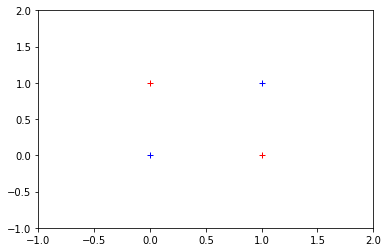

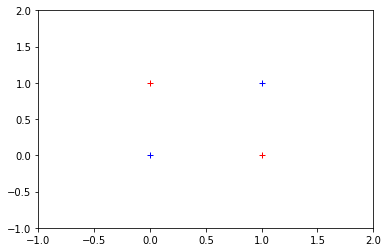

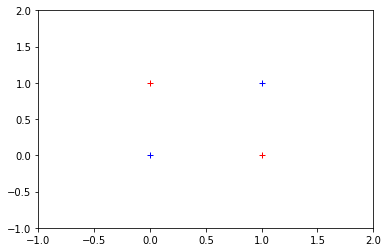

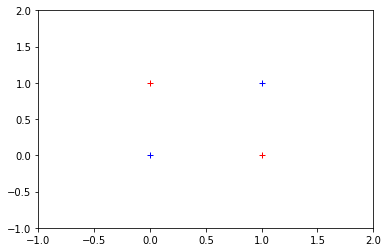

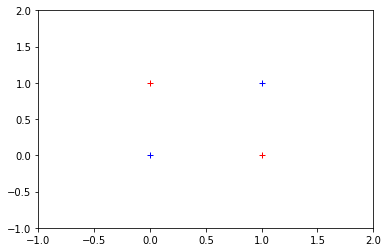

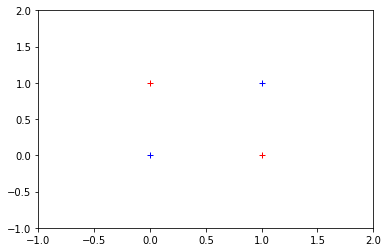

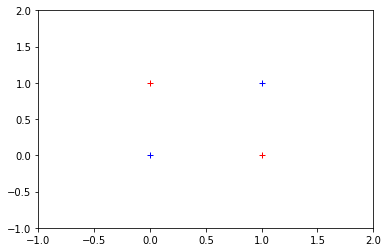

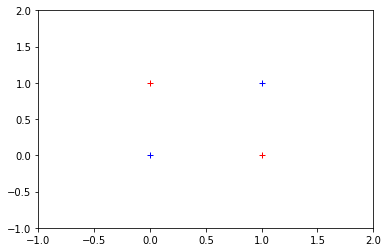

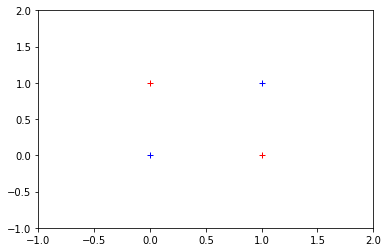

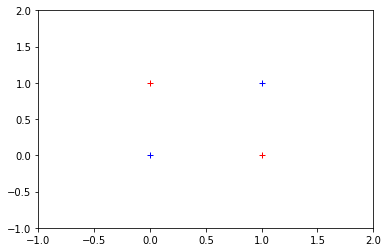

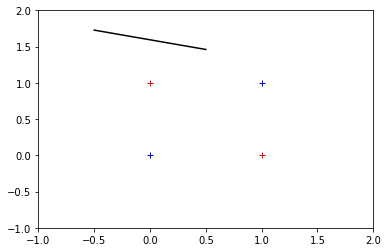

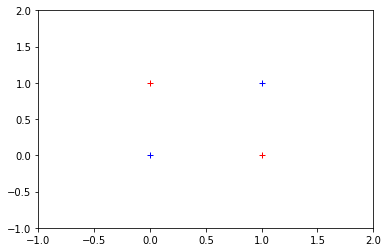

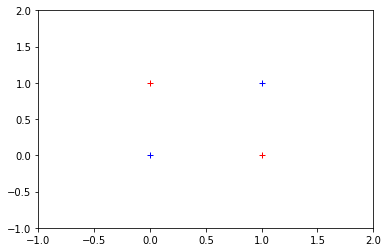

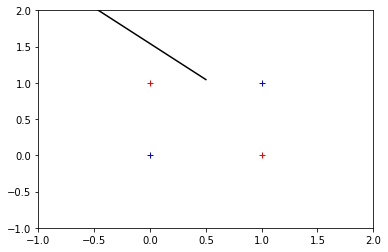

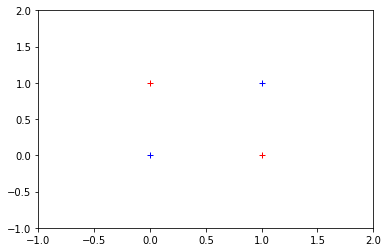

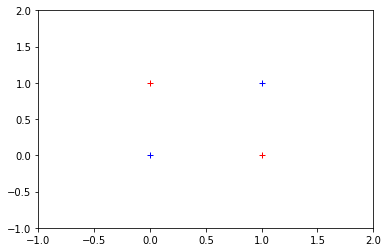

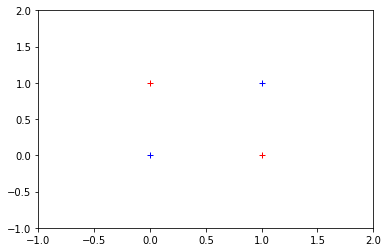

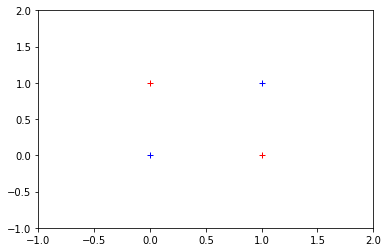

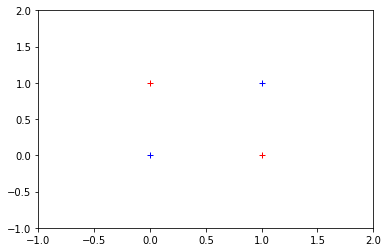

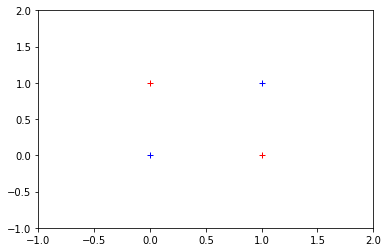

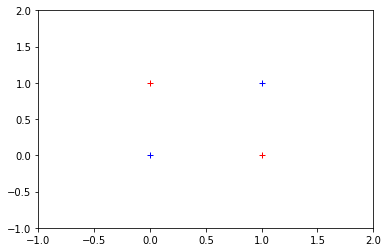

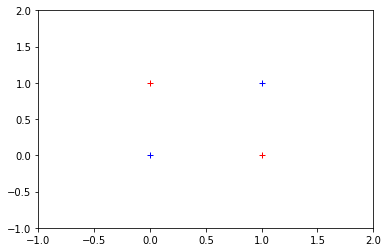

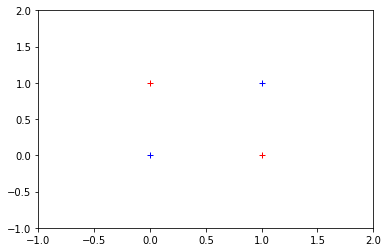

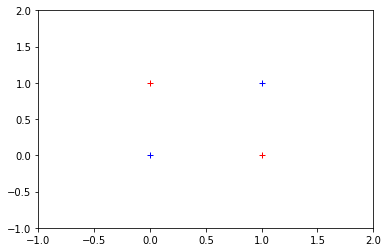

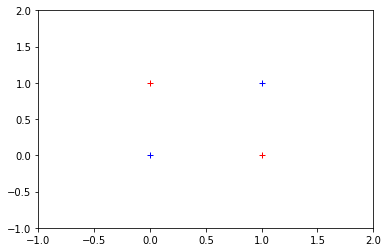

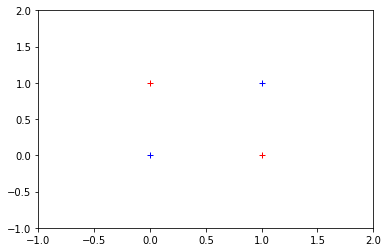

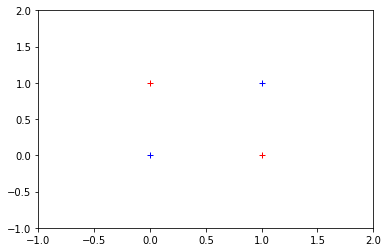

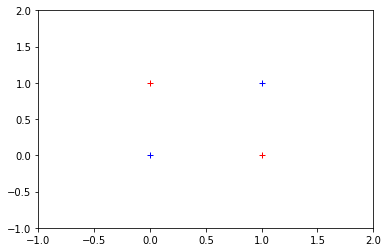

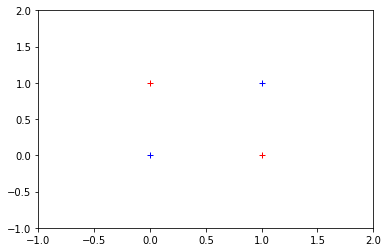

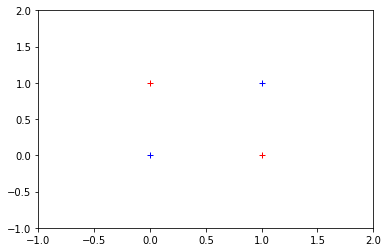

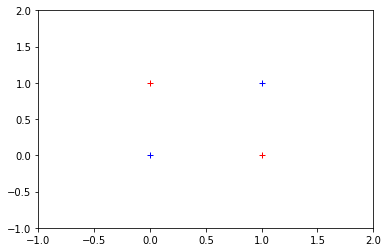

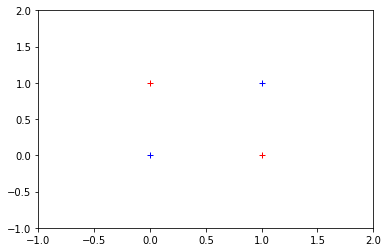

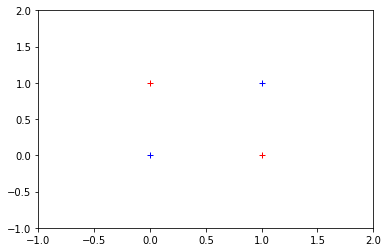

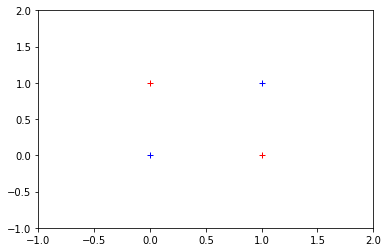

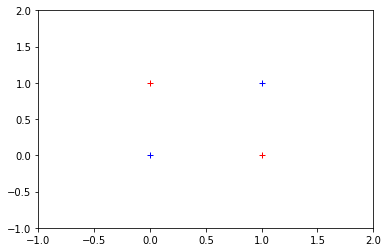

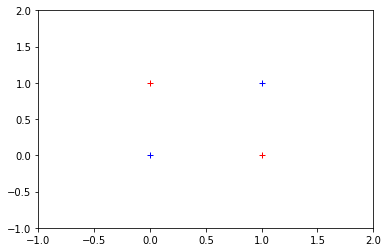

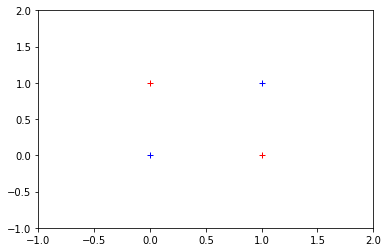

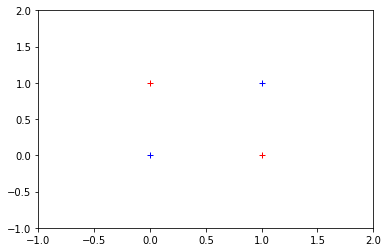

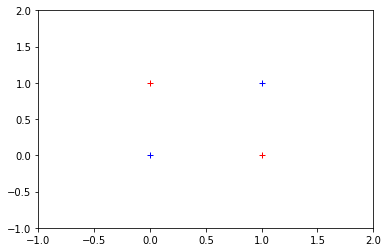

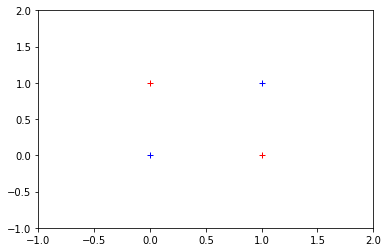

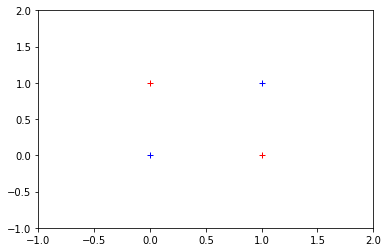

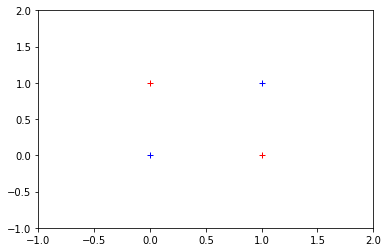

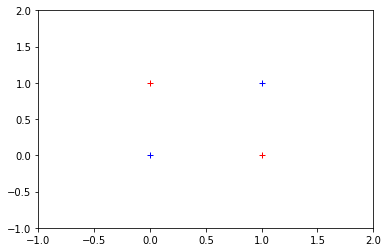

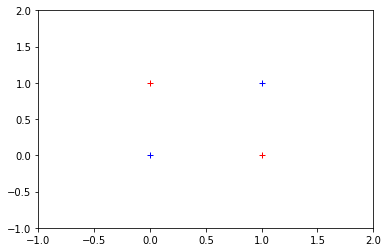

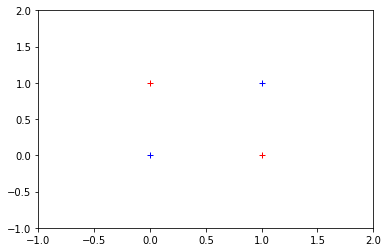

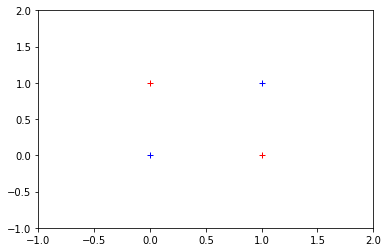

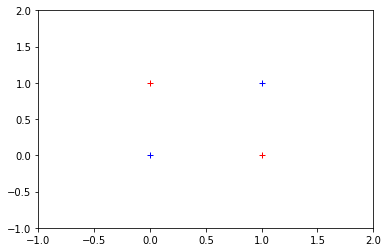

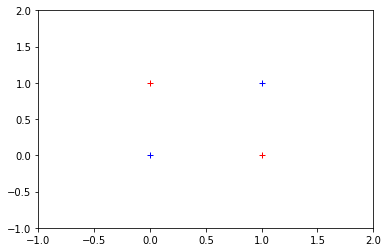

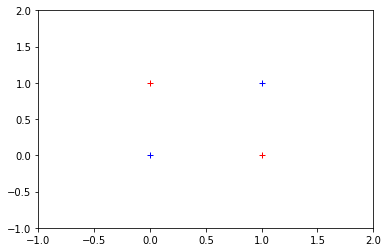

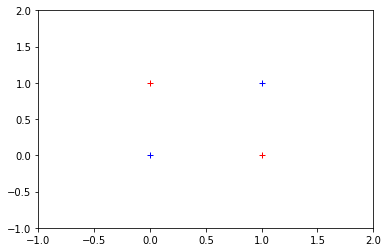

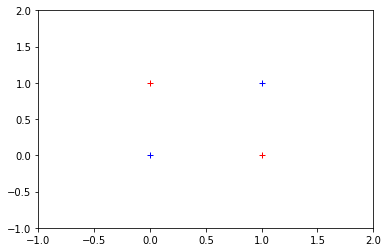

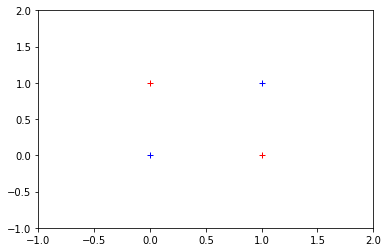

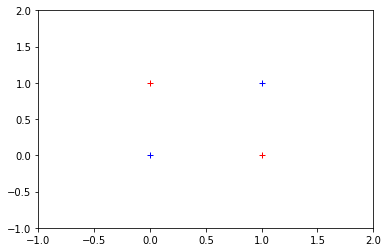

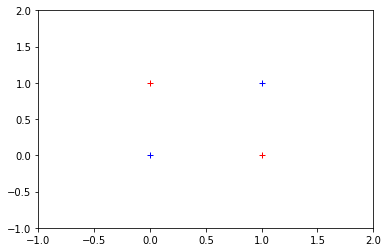

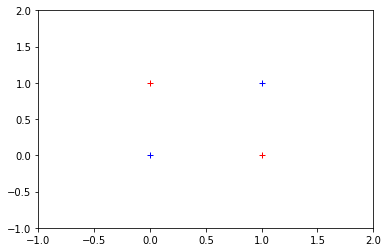

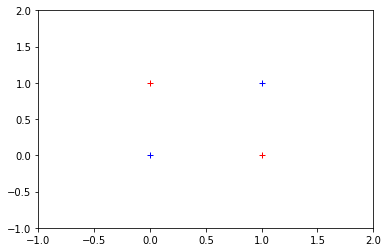

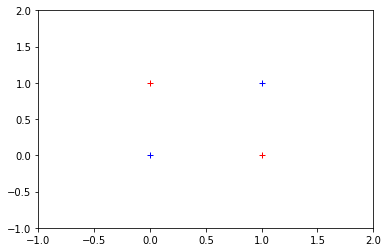

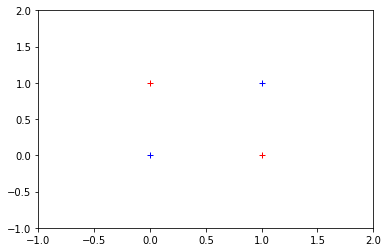

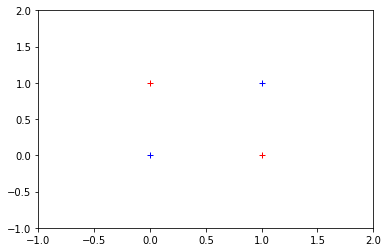

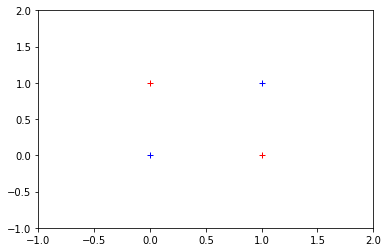

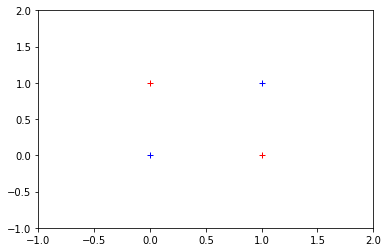

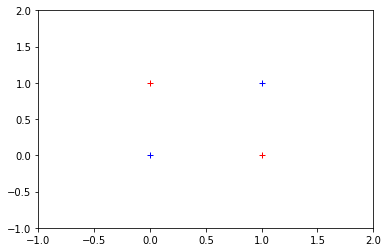

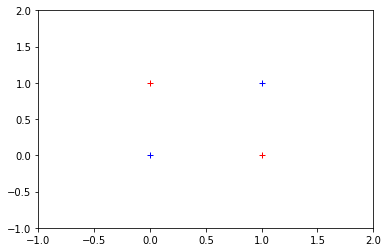

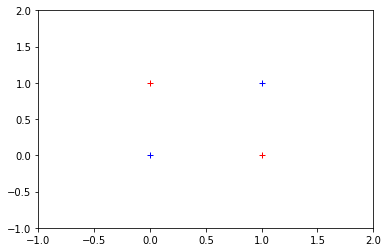

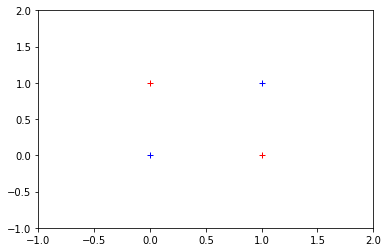

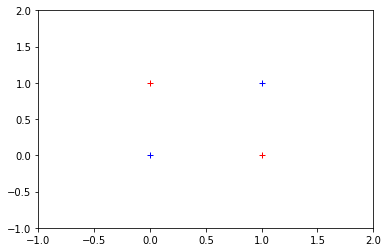

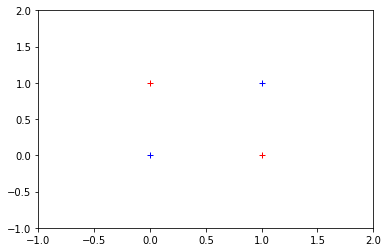

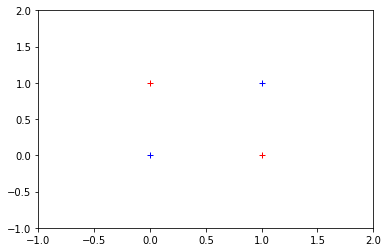

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([-1,1,1,-1])
algoritmul_widrow_hoff(x,y,70,0.1)

In [ ]:
def plot_decision(X_, W_1, W_2, b_1, b_2): # sterge continutul ferestrei
  plt.clf()
# ploteaza multimea de antrenare plt.ylim((-0.5, 1.5))
  plt.xlim((-0.5, 1.5))
  xx = np.random.normal(0, 1, (100000))
  yy = np.random.normal(0, 1, (100000))
  X = np.array([xx, yy]).transpose()
  X = np.concatenate((X, X_))
  _, _, _, output = forward(X, W_1, b_1, W_2, b_2) 
  y = np.squeeze(np.round(output))
  plt.plot(X[y == 0, 0], X[y == 0, 1], 'b+')
  plt.plot(X[y == 1, 0], X[y == 1, 1], 'r+')
  plt.show(block=False)
  plt.pause(0.1)

#### Exercitiul 4

Definim in prima faza functiile de activare ale retelei, tanh si sigmoid si derivata tanh.

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def tanh(x):
  return (np.exp(2*x) -1)/(np.exp(2*x)+1)
def tanh_derivative(x):
  t = tanh(x)
  return 1 - t**2

Urmatoarea functie trece un input(X) prin retea si salveaza rezultatele intermediare. z_1 este rezultatul celui de-al 2-lea strat inainte de functia de activare, iar a_1 rezultatul functiei de activare(deci a_1=tanh(z_1)).

z_2 este rezultatul ultimului strat inainte de functia de activare, iar a_2 rezultatul dupa aceasta (a_2=sigmoid(z_2))

In [ ]:
def forward(X, W_1, b_1, W_2, b_2):
  z_1= np.dot(X,W_1)+b_1
  a_1 = tanh(z_1)
  z_2 = np.dot(a_1, W_2) + b_2
  a_2 = sigmoid(z_2)
  return z_1, a_1, z_2, a_2 

Functia urmatoare se foloseste de rezultatele intermediare salvate dupa apelul functiei forward pentru a calcula derivata functiei de pierdere in functie de weight-urile retelei (w_1,b_1,w_2,b_2).

Formulele aplicate in functia de mai jos sunt obtinute prin chain rule:

h(x) = f(g(x))
h'(x) = g'(x)*f'(g(x))

In [ ]:
def backward(a_1, a_2, z_1, W_2, X, Y, num_samples):
  dz_2 = a_2 - y # derivata functiei de pierdere (logistic loss) in functie de z
  dw_2 = np.dot(a_1.T, dz_2) / num_samples
  # der(L/w_2) = der(L/z_2) * der(dz_2/w_2) = dz_2 * der((a_1 * W_2 + b_2)/ W_2)
  db_2 = np.sum(dz_2) / num_samples
  # der(L/b_2) = der(L/z_2) * der(z_2/b_2) = dz_2 * der((a_1 * W_2 + b_2)/ b_2)
  # primul strat
  da_1 = dz_2 * W_2.T
  dz_1 = da_1 * tanh_derivative(z_1)
  # der(L/z_1) = der(L/a_1) * der(a_1/z1) = da_1 .* der((tanh(z_1))/ z_1)
  dw_1 = np.dot(X.T, dz_1) / num_samples
  # der(L/w_1) = der(L/z_1) * der(z_1/w_1) = dz_1 * der((X * W_1 + b_1)/ W_1)
  db_1 = np.sum(dz_1) / num_samples
  # der(L/b_1) = der(L/z_1) * der(z_1/b_1) = dz_1 * der((X * W_1 + b_1)/ b_1)
  return dw_1, db_1, dw_2, db_2

Urmeaza initializarea weight-urilor retelei, care se face random

In [ ]:
import numpy.random as random
num_hidden_neurons = 5
miu = 0
sigma = 1
W_1 = random.normal(size=(2, num_hidden_neurons), loc=miu, scale= sigma)
# generam aleator matricea ponderilor stratului ascuns (2 - dimensiunea datelor de intrare, num_hidden_neurons - numarul neuronilor de pe stratul ascuns), cu media miu si deviatia standard sigma.
b_1 = np.zeros(num_hidden_neurons) # initializam bias-ul cu 0
W_2 = random.normal(size=(num_hidden_neurons, 1), loc=miu, scale=sigma)
# generam aleator matricea ponderilor stratului de iesire (num_hidden_neurons - numarul neuronilor de pe stratul ascuns, 1 - un neuron pe stratul de iesire), cu media miu si deviatia standard sigma.
b_2 = np.zeros(1) # initializam bias-ul cu 0

Algoritmul gradient descent:
- folosim functia forward pentru a calcula valorile intermediare (z_1,a_1,z_2,a_2)
- cu functia backward calculam gradientii
- updatam weight-urile cu gradientii obtinuti si learning_rate-ul stabilit

(100004, 1)


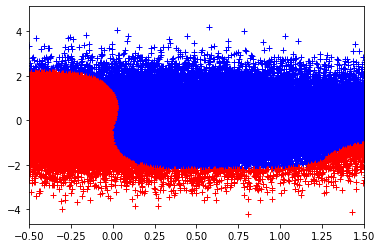

(4, 1)
Loss: 0.6734604042816543, accuracy: 0.75
(100004, 1)


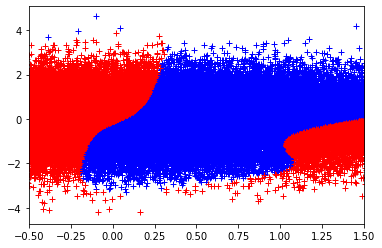

(4, 1)
Loss: 0.6477307672261164, accuracy: 0.5
(100004, 1)


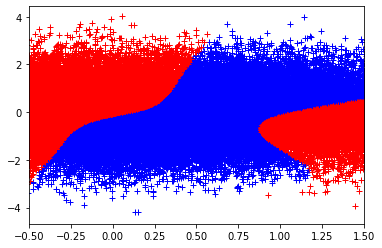

(4, 1)
Loss: 0.6324889466045387, accuracy: 0.5
(100004, 1)


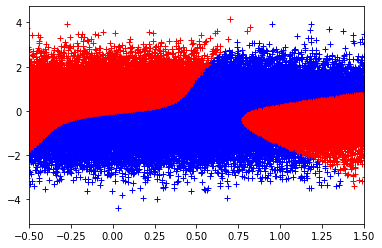

(4, 1)
Loss: 0.6212067692607258, accuracy: 0.75
(100004, 1)


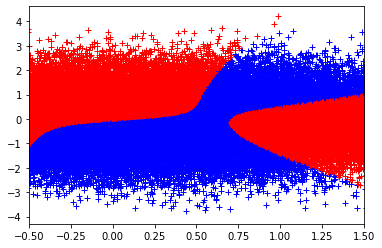

(4, 1)
Loss: 0.6112206755232023, accuracy: 1.0
(100004, 1)


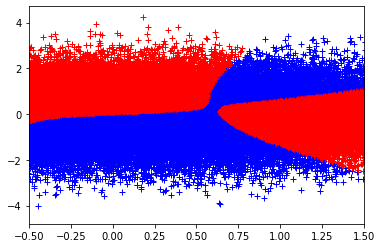

(4, 1)
Loss: 0.6015190576943504, accuracy: 1.0
(100004, 1)


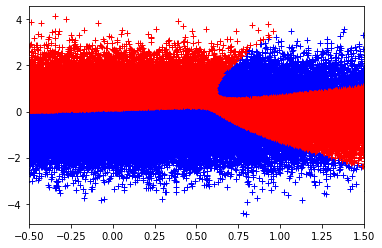

(4, 1)
Loss: 0.5917588666020452, accuracy: 1.0
(100004, 1)


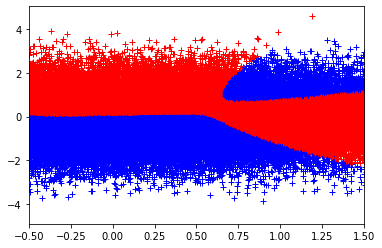

(4, 1)
Loss: 0.5818640078630014, accuracy: 1.0
(100004, 1)


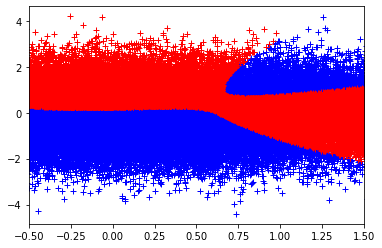

(4, 1)
Loss: 0.5718619813058313, accuracy: 1.0
(100004, 1)


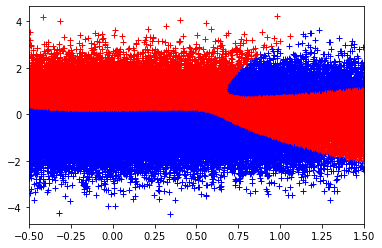

(4, 1)
Loss: 0.5618141507144173, accuracy: 1.0
(100004, 1)


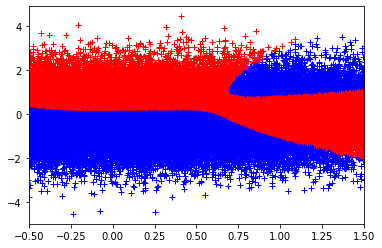

(4, 1)
Loss: 0.5517840085158416, accuracy: 1.0
(100004, 1)


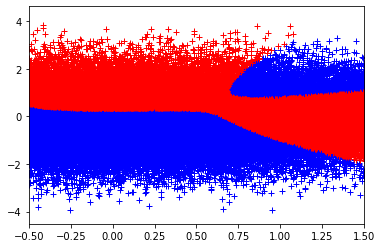

(4, 1)
Loss: 0.5418229825089986, accuracy: 1.0
(100004, 1)


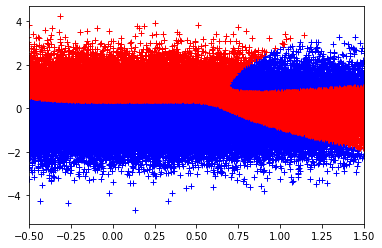

(4, 1)
Loss: 0.5319659130621048, accuracy: 1.0
(100004, 1)


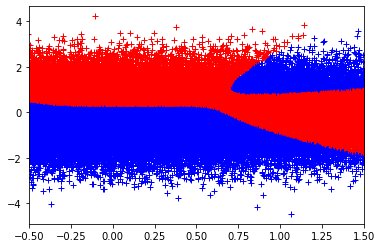

(4, 1)
Loss: 0.5222321859685646, accuracy: 1.0
(100004, 1)


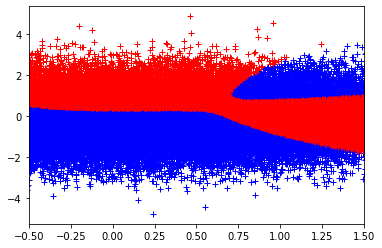

(4, 1)
Loss: 0.5126296225588132, accuracy: 1.0
(100004, 1)


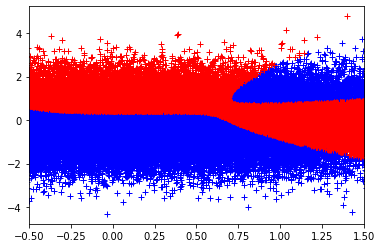

(4, 1)
Loss: 0.5031589453190489, accuracy: 1.0
(100004, 1)


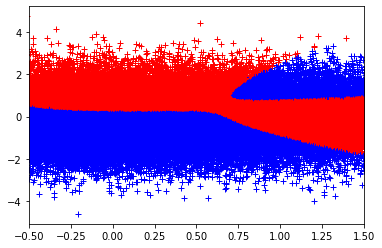

(4, 1)
Loss: 0.49381749819666776, accuracy: 1.0
(100004, 1)


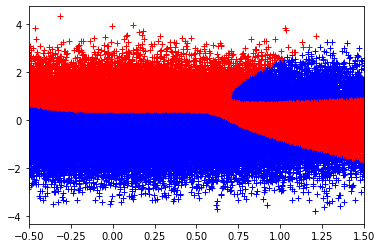

(4, 1)
Loss: 0.48460173148093366, accuracy: 1.0
(100004, 1)


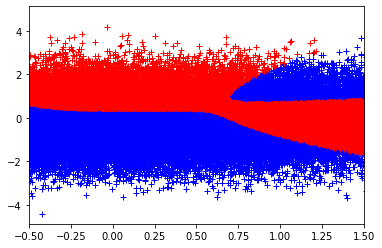

(4, 1)
Loss: 0.475508526161431, accuracy: 1.0
(100004, 1)


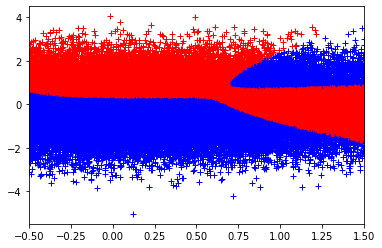

(4, 1)
Loss: 0.4665356798684721, accuracy: 1.0
(100004, 1)


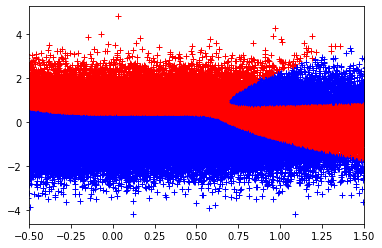

(4, 1)
Loss: 0.45768189900819, accuracy: 1.0
(100004, 1)


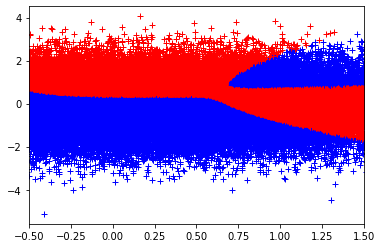

(4, 1)
Loss: 0.4489465626311346, accuracy: 1.0
(100004, 1)


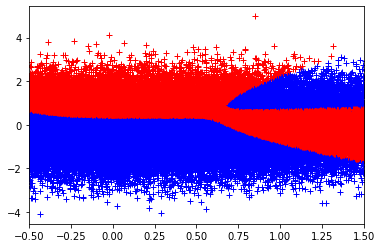

(4, 1)
Loss: 0.44032942704612055, accuracy: 1.0
(100004, 1)


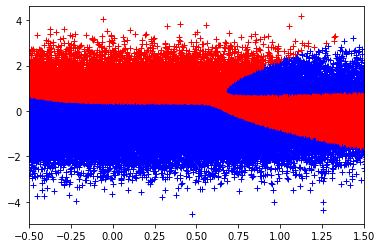

(4, 1)
Loss: 0.4318303625295121, accuracy: 1.0
(100004, 1)


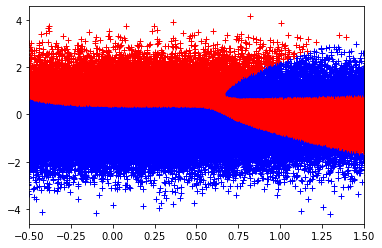

(4, 1)
Loss: 0.4234491614223601, accuracy: 1.0
(100004, 1)


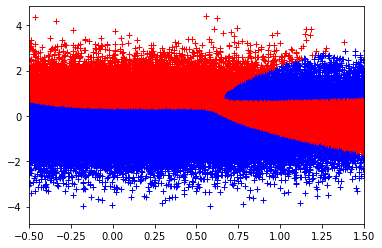

(4, 1)
Loss: 0.4151854257707587, accuracy: 1.0
(100004, 1)


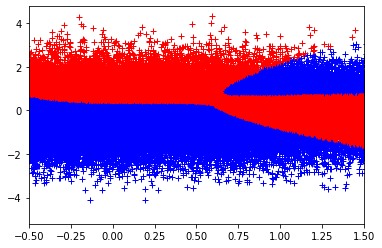

(4, 1)
Loss: 0.40703852596773316, accuracy: 1.0
(100004, 1)


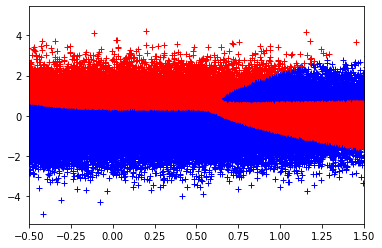

(4, 1)
Loss: 0.39900761440599153, accuracy: 1.0
(100004, 1)


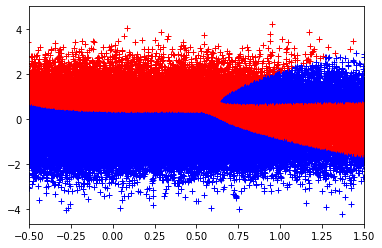

(4, 1)
Loss: 0.39109167631987246, accuracy: 1.0
(100004, 1)


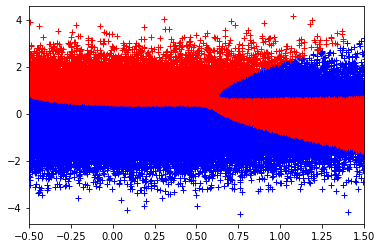

(4, 1)
Loss: 0.3832896013280571, accuracy: 1.0
(100004, 1)


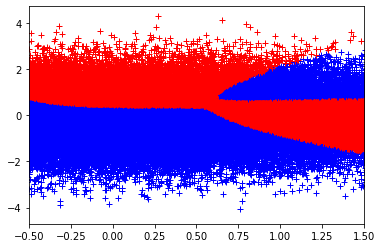

(4, 1)
Loss: 0.3756002620607747, accuracy: 1.0
(100004, 1)


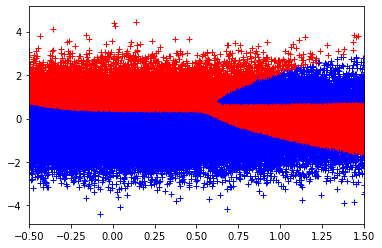

(4, 1)
Loss: 0.36802258963410645, accuracy: 1.0
(100004, 1)


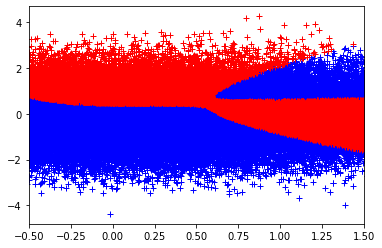

(4, 1)
Loss: 0.3605556390104498, accuracy: 1.0
(100004, 1)


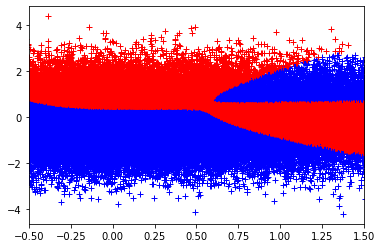

(4, 1)
Loss: 0.3531986401393105, accuracy: 1.0
(100004, 1)


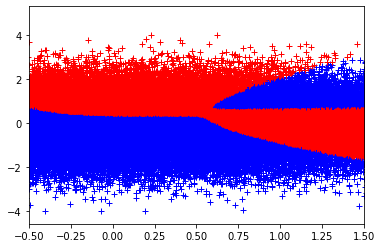

(4, 1)
Loss: 0.34595103307591824, accuracy: 1.0
(100004, 1)


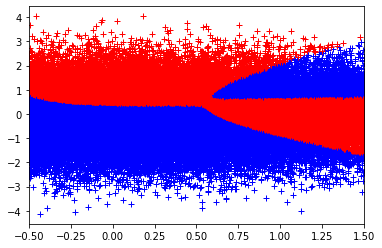

(4, 1)
Loss: 0.338812487010614, accuracy: 1.0
(100004, 1)


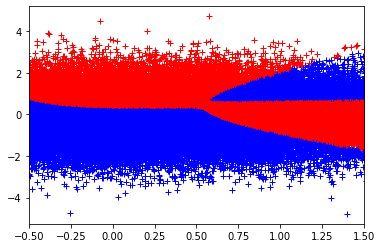

(4, 1)
Loss: 0.3317829043570506, accuracy: 1.0
(100004, 1)


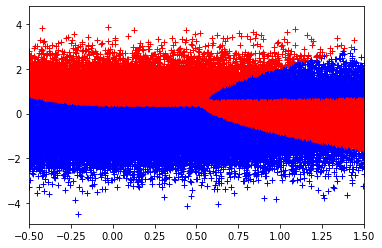

(4, 1)
Loss: 0.3248624118197835, accuracy: 1.0
(100004, 1)


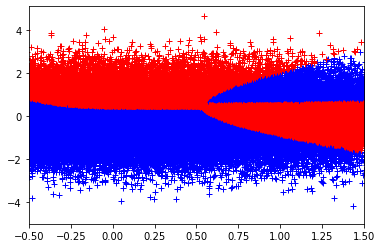

(4, 1)
Loss: 0.31805134077912195, accuracy: 1.0
(100004, 1)


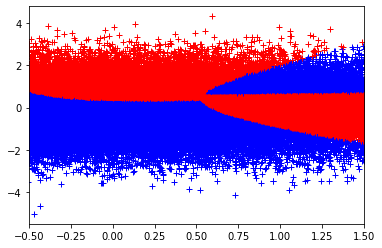

(4, 1)
Loss: 0.3113501994776312, accuracy: 1.0
(100004, 1)


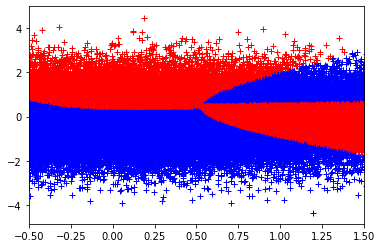

(4, 1)
Loss: 0.30475963944369955, accuracy: 1.0
(100004, 1)


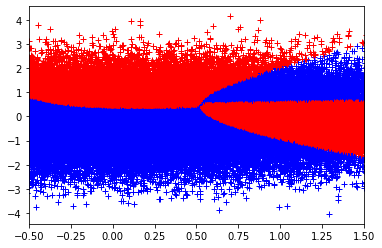

(4, 1)
Loss: 0.29828041840630715, accuracy: 1.0
(100004, 1)


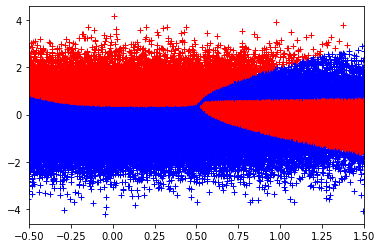

(4, 1)
Loss: 0.2919133616924038, accuracy: 1.0
(100004, 1)


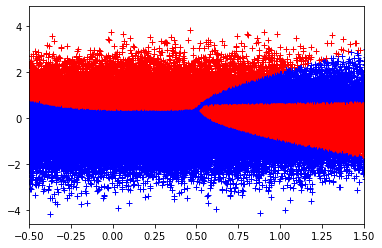

(4, 1)
Loss: 0.28565932379330317, accuracy: 1.0
(100004, 1)


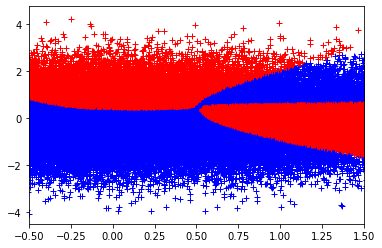

(4, 1)
Loss: 0.279519151468416, accuracy: 1.0
(100004, 1)


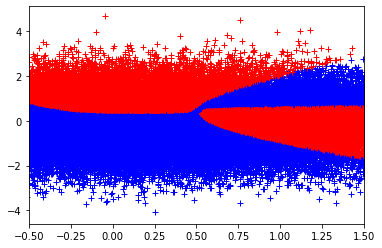

(4, 1)
Loss: 0.2734936494441555, accuracy: 1.0
(100004, 1)


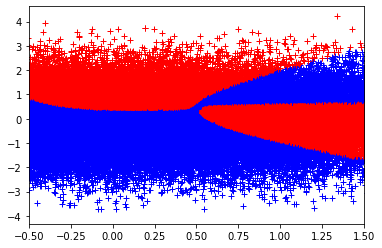

(4, 1)
Loss: 0.26758354947690166, accuracy: 1.0
(100004, 1)


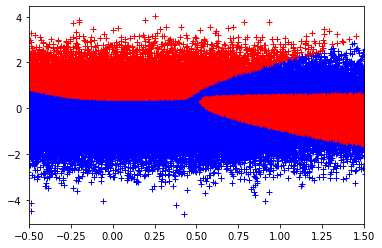

(4, 1)
Loss: 0.2617894832900945, accuracy: 1.0
(100004, 1)


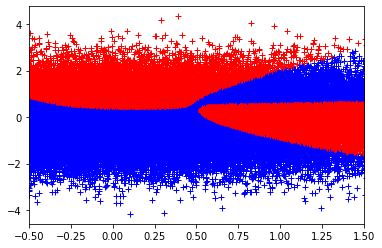

(4, 1)
Loss: 0.25611195967137124, accuracy: 1.0
(100004, 1)


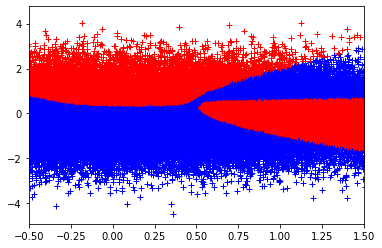

(4, 1)
Loss: 0.25055134582767596, accuracy: 1.0
(100004, 1)


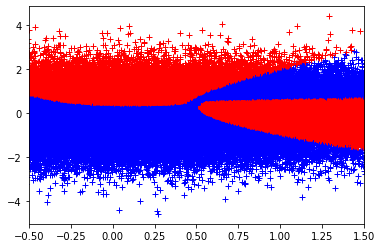

(4, 1)
Loss: 0.2451078529437954, accuracy: 1.0
(100004, 1)


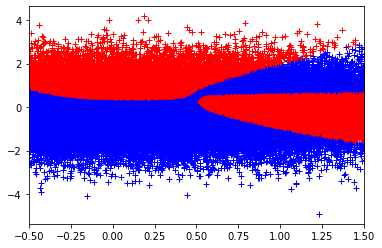

(4, 1)
Loss: 0.23978152577067316, accuracy: 1.0
(100004, 1)


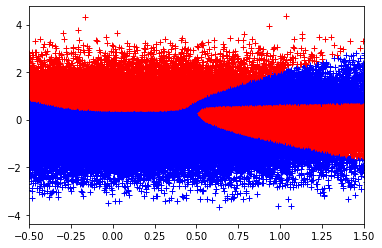

(4, 1)
Loss: 0.23457223598104893, accuracy: 1.0
(100004, 1)


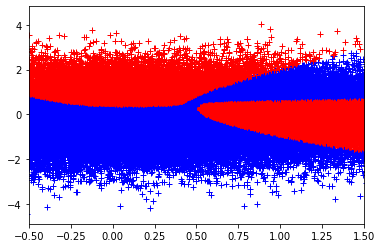

(4, 1)
Loss: 0.22947967896786448, accuracy: 1.0
(100004, 1)


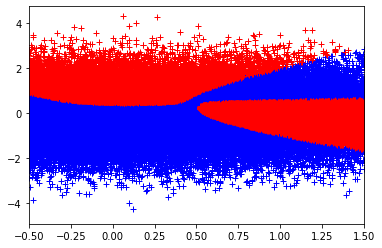

(4, 1)
Loss: 0.22450337372166845, accuracy: 1.0
(100004, 1)


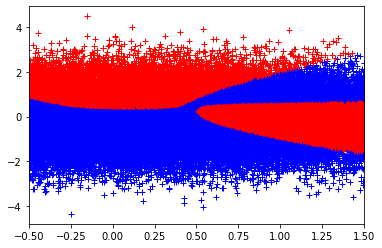

(4, 1)
Loss: 0.2196426654031513, accuracy: 1.0
(100004, 1)


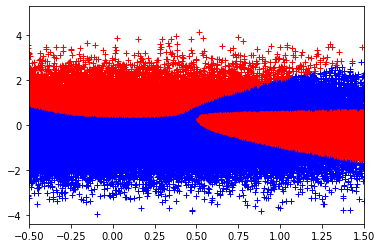

(4, 1)
Loss: 0.21489673022237094, accuracy: 1.0
(100004, 1)


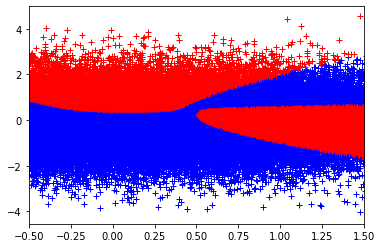

(4, 1)
Loss: 0.21026458224386838, accuracy: 1.0
(100004, 1)


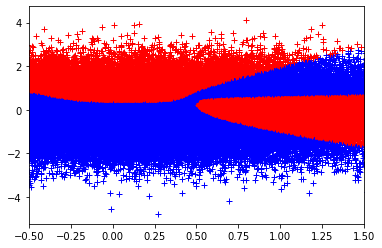

(4, 1)
Loss: 0.20574508175378178, accuracy: 1.0
(100004, 1)


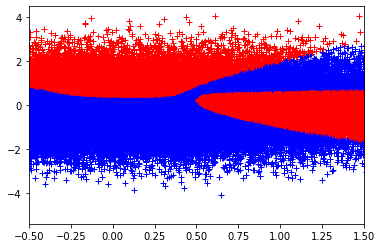

(4, 1)
Loss: 0.20133694484867012, accuracy: 1.0
(100004, 1)


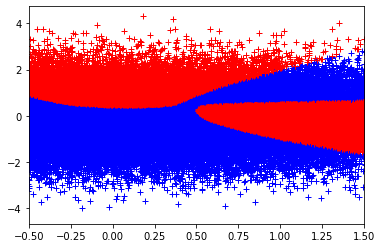

(4, 1)
Loss: 0.1970387539338665, accuracy: 1.0
(100004, 1)


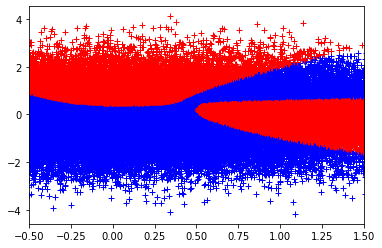

(4, 1)
Loss: 0.19284896884997593, accuracy: 1.0
(100004, 1)


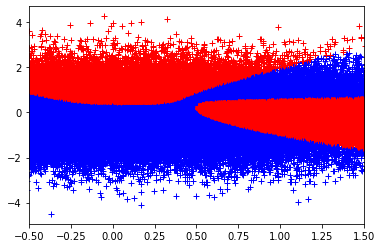

(4, 1)
Loss: 0.18876593837813233, accuracy: 1.0
(100004, 1)


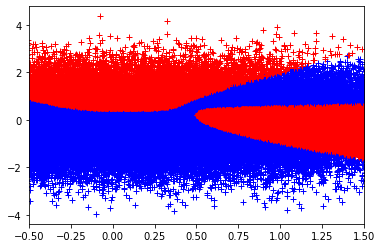

(4, 1)
Loss: 0.18478791190666785, accuracy: 1.0
(100004, 1)


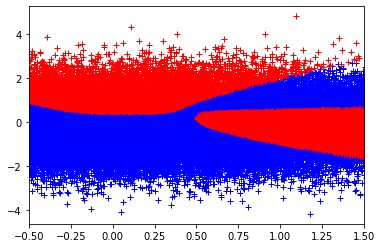

(4, 1)
Loss: 0.18091305107301928, accuracy: 1.0
(100004, 1)


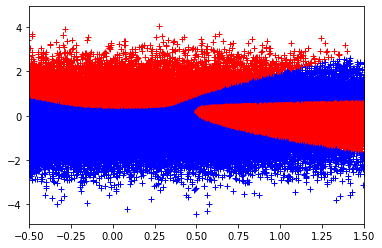

(4, 1)
Loss: 0.17713944122434522, accuracy: 1.0
(100004, 1)


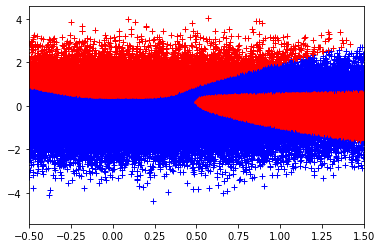

(4, 1)
Loss: 0.17346510256798858, accuracy: 1.0
(100004, 1)


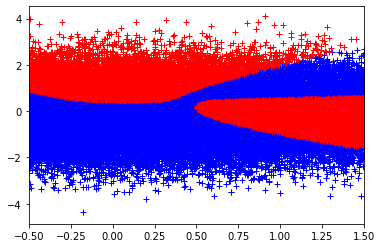

(4, 1)
Loss: 0.16988800090828338, accuracy: 1.0
(100004, 1)


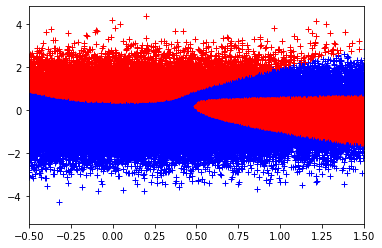

(4, 1)
Loss: 0.16640605788912224, accuracy: 1.0
(100004, 1)


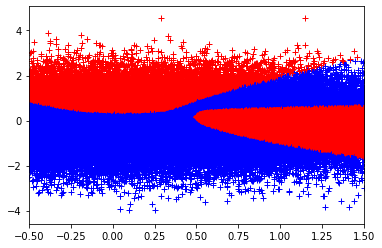

(4, 1)
Loss: 0.16301716068210073, accuracy: 1.0


In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
epochs = 70
learning_rate = 0.5
for i in range(epochs):
  plot_decision(x,W_1,W_2,b_1,b_2)
  p = np.random.permutation(x.shape[0])
  x = x[p]
  y = y[p]
  z_1, a_1, z_2, a_2 = forward(x, W_1, b_1, W_2, b_2)
  loss = (-y * np.log(a_2) - (1 - y) * np.log(1 - a_2)).mean()
  y_pred = np.round(a_2)
  accuracy = (y_pred == y).mean()
  dw1, db1, dw2,db2 = backward(a_1, a_2, z_1, W_2, x, y, x.shape[0])
  W_1 = W_1 - learning_rate*dw1
  b_1 = b_1 - learning_rate*db1
  W_2 = W_2 - learning_rate*dw2
  b_2 = b_2 - learning_rate*db2
  
  print(f"Loss: {loss}, accuracy: {accuracy}")
  